In [8]:
import numpy as np
import matplotlib.pyplot as plt
import mdtraj as md

In [9]:
#List of lambda values
lambdas = ['1.00', '1.06', '1.08']

#Nr of replicas
replicas = 10

#Experimental Kd
Kd_exp = 4.9

#Bound threshold (nm)
thresh = 0.8

# Fraction bound with mindist between all beads

/lindorffgrp-isilon/thomasen/software/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


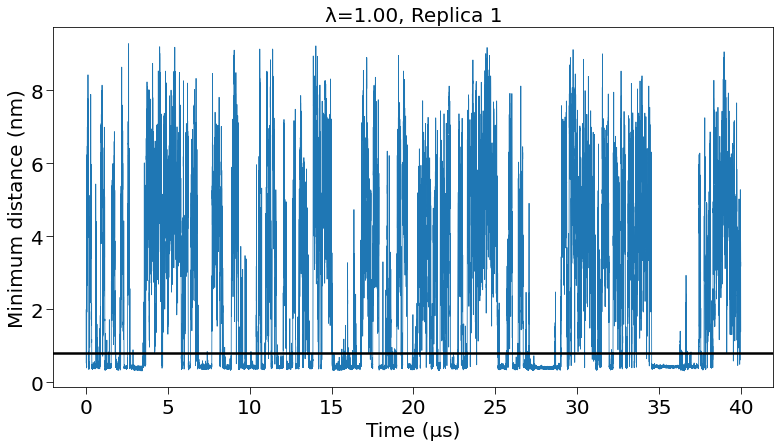

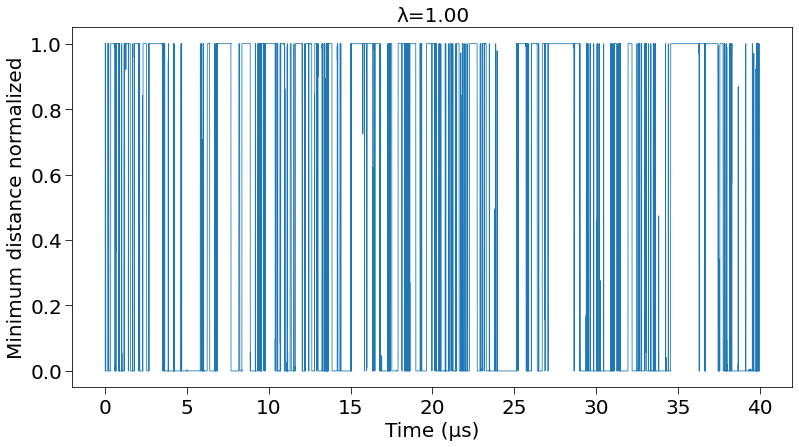

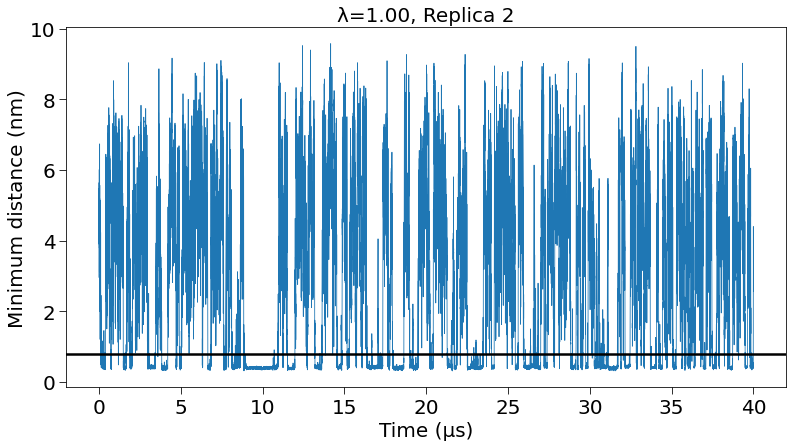

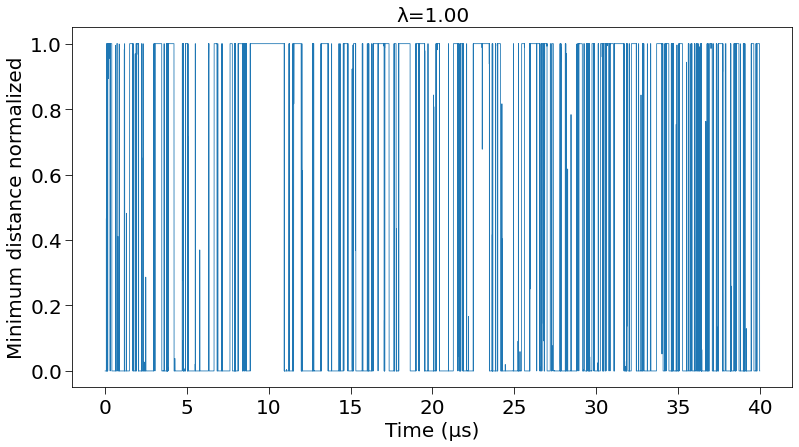

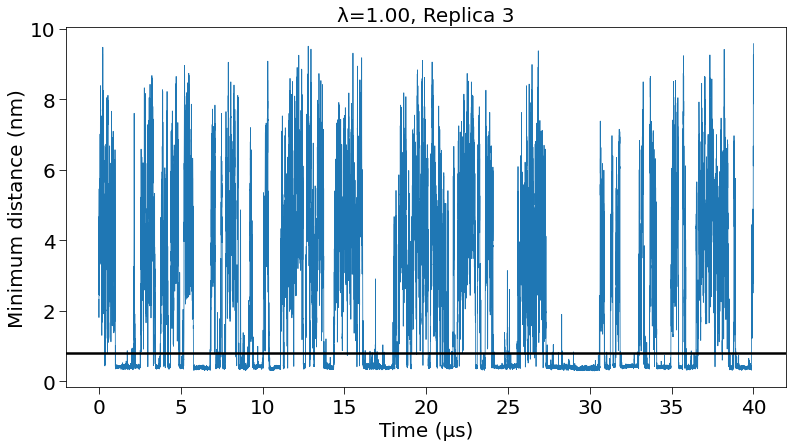

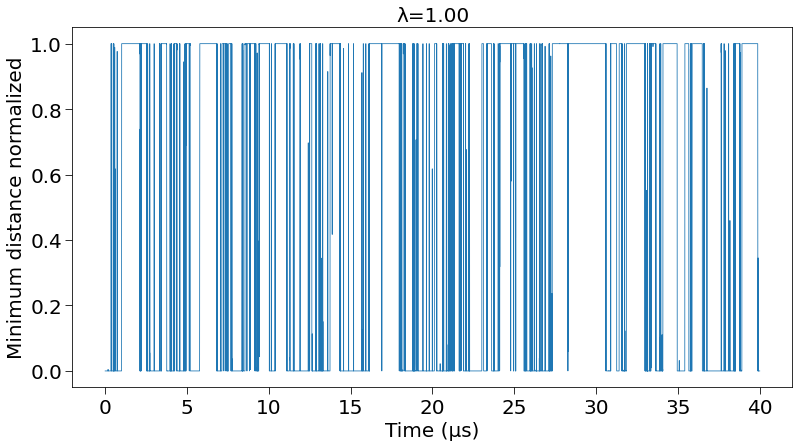

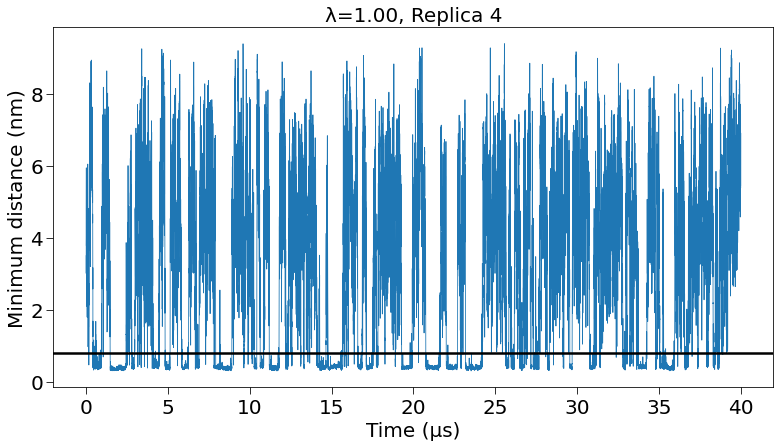

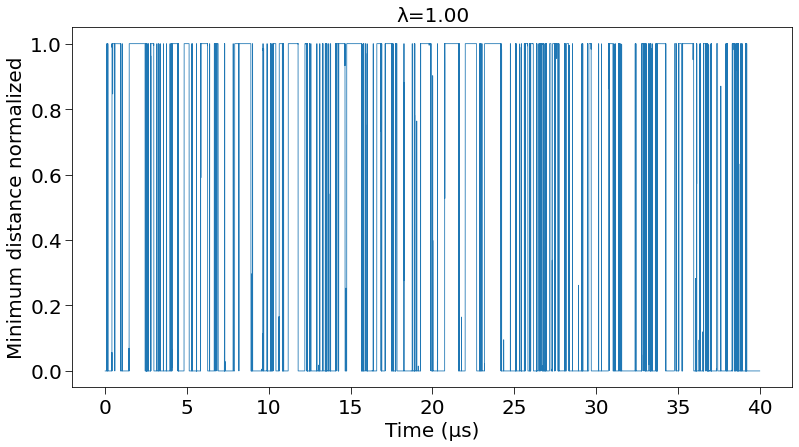

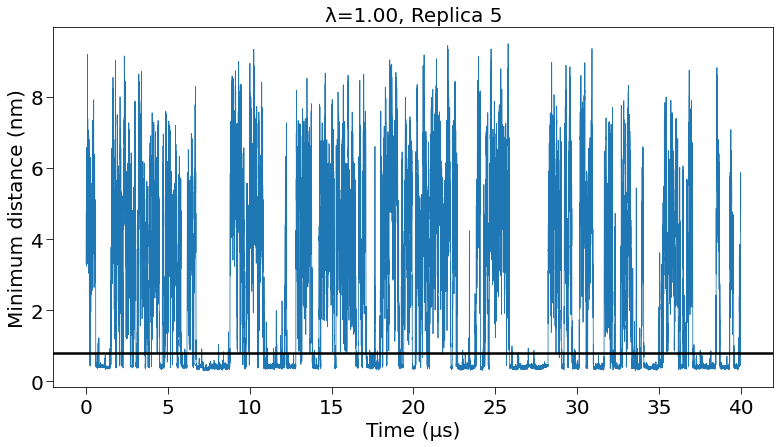

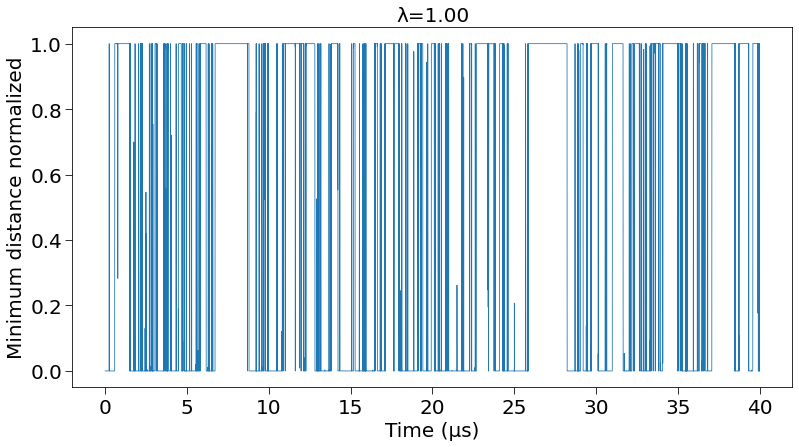

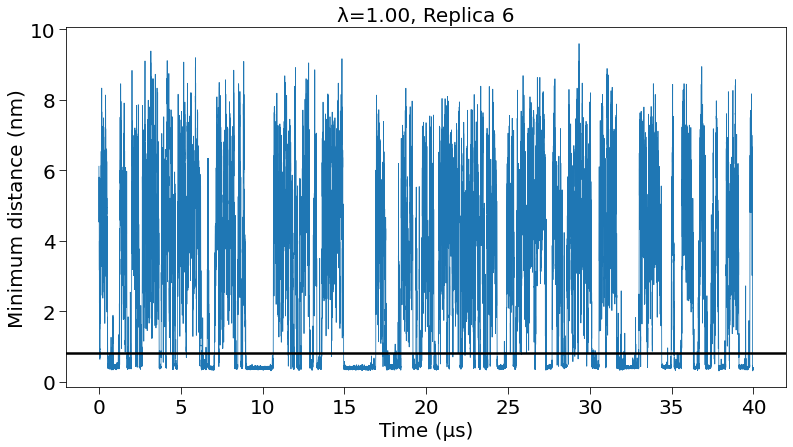

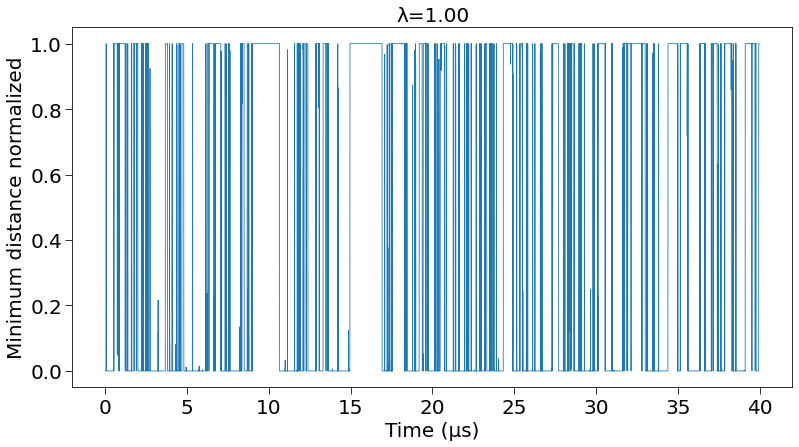

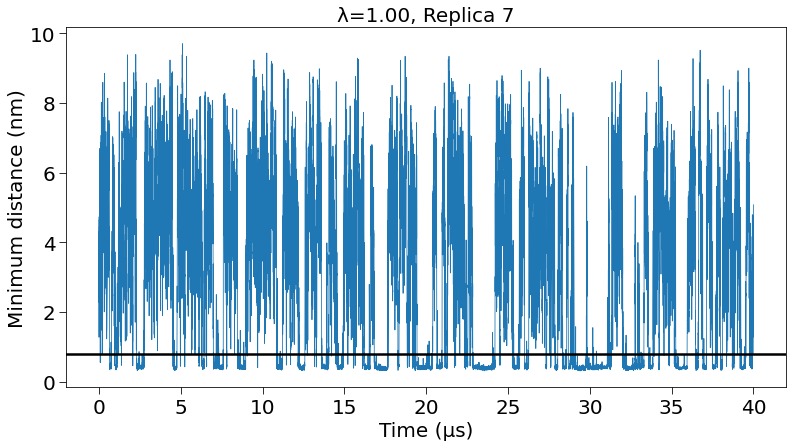

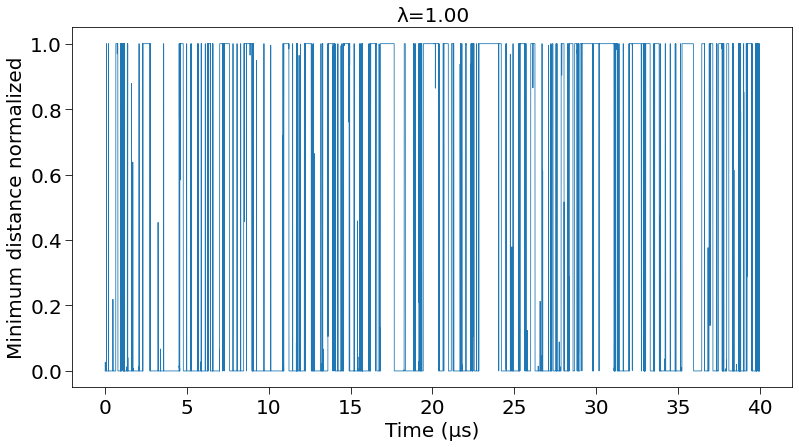

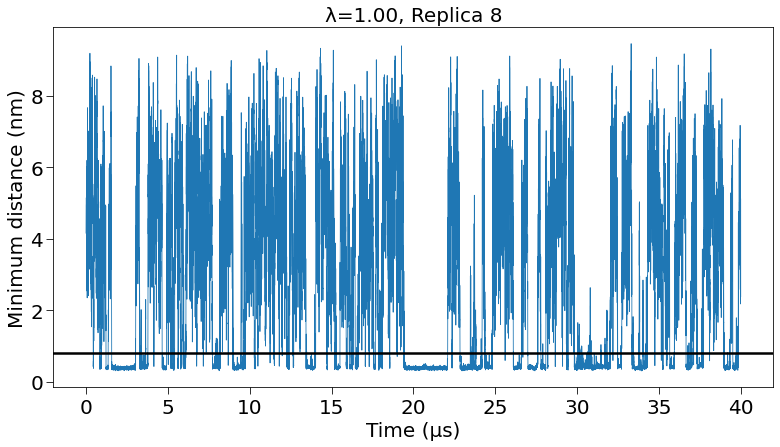

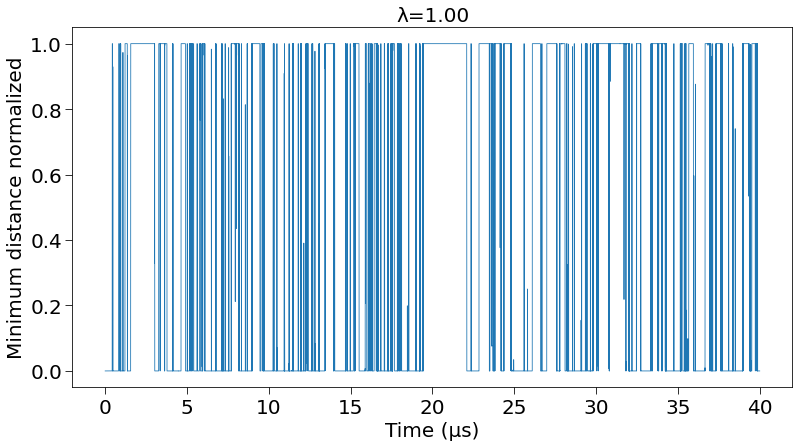

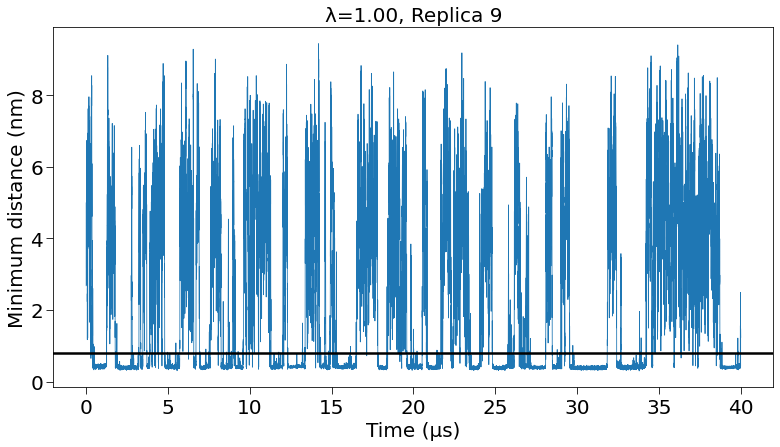

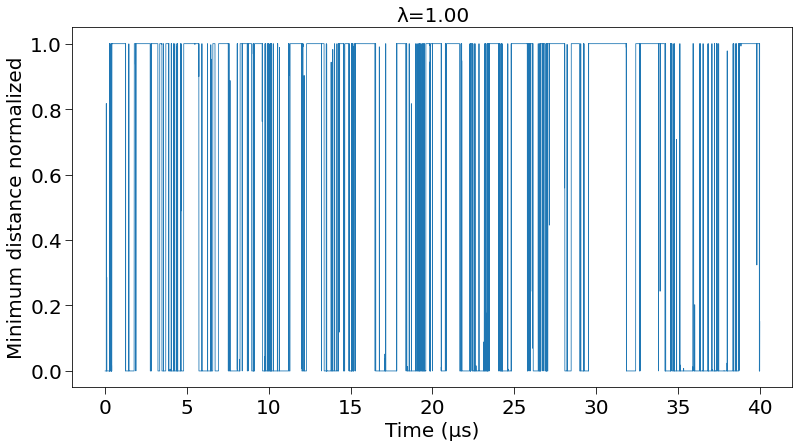

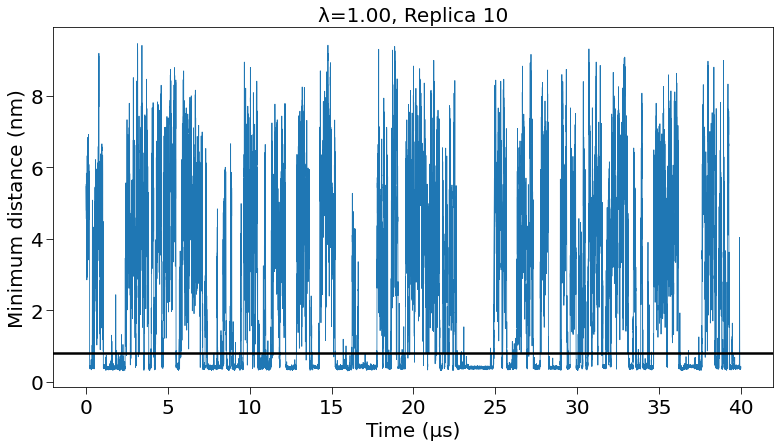

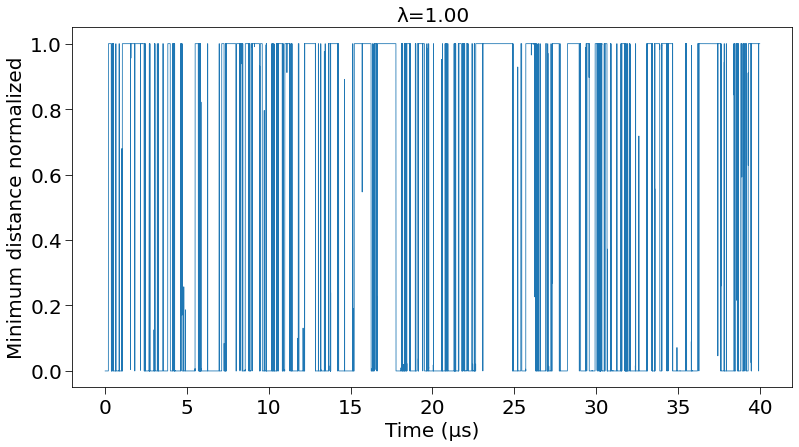

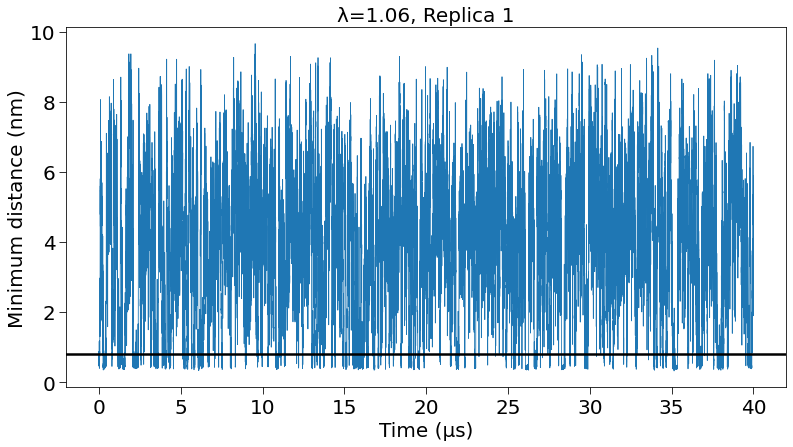

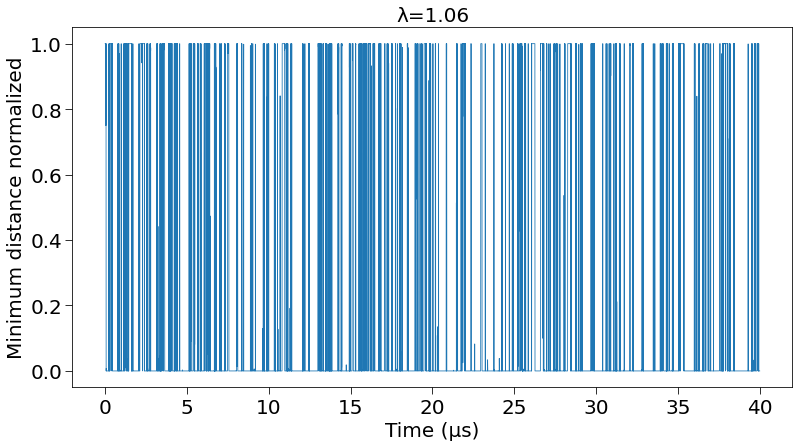

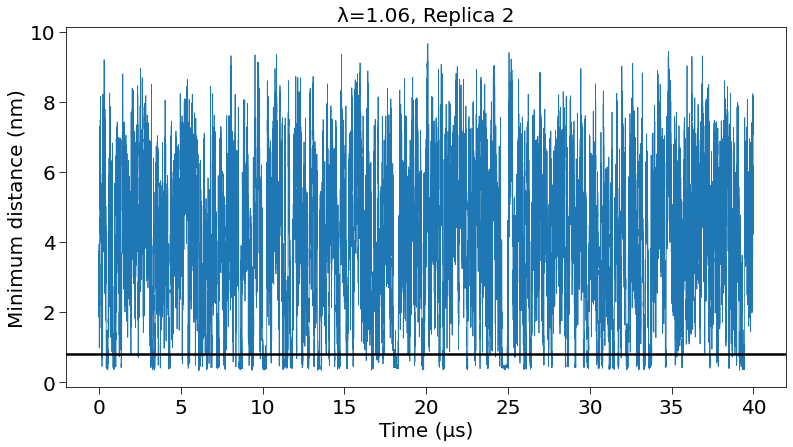

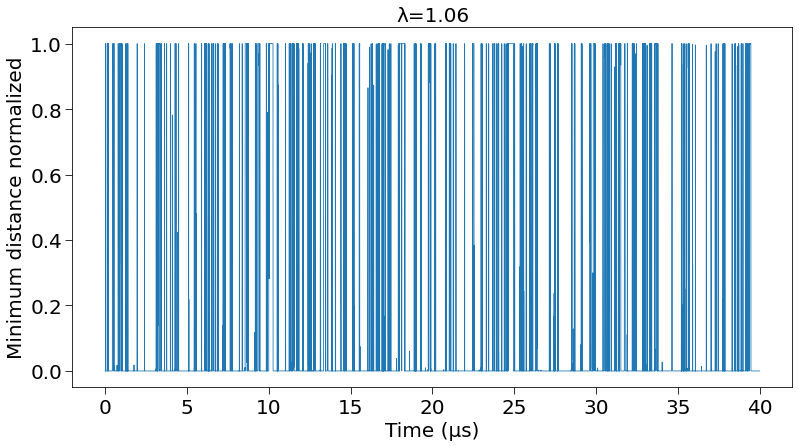

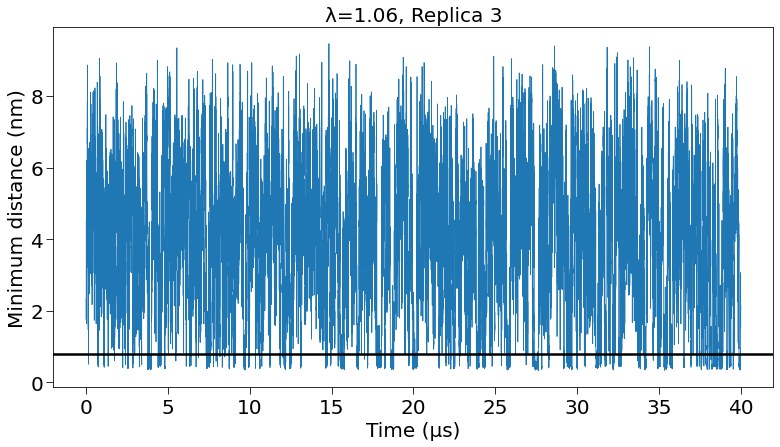

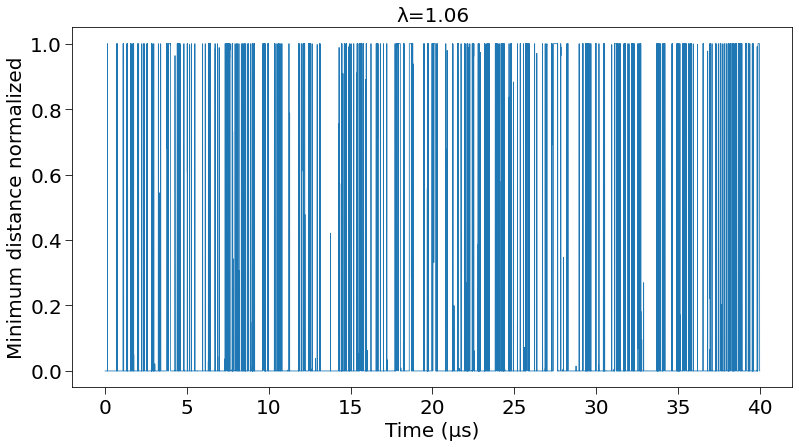

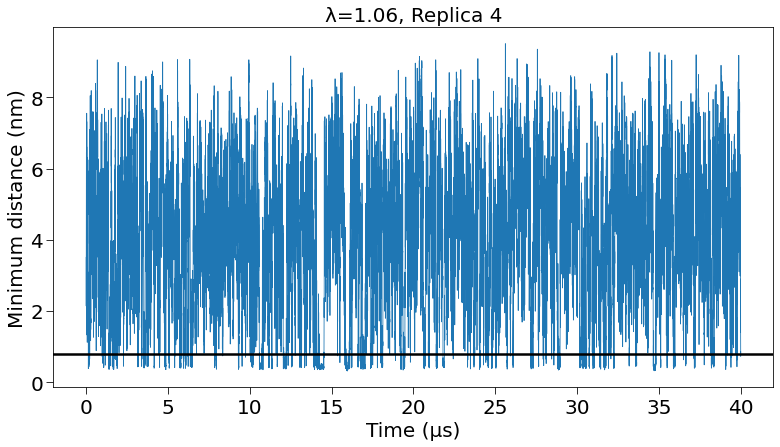

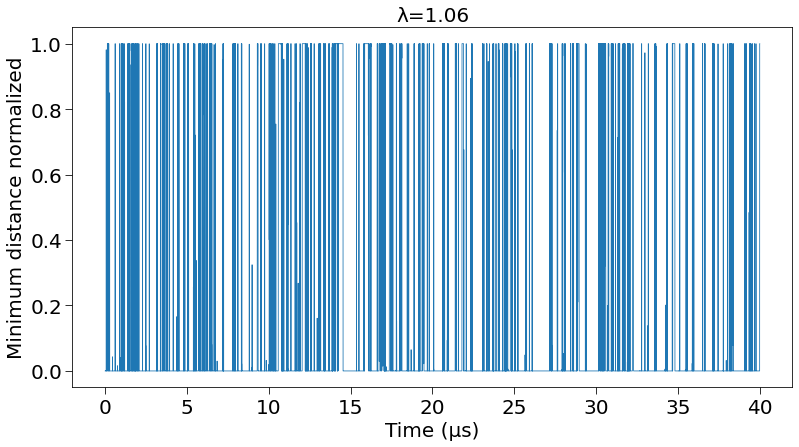

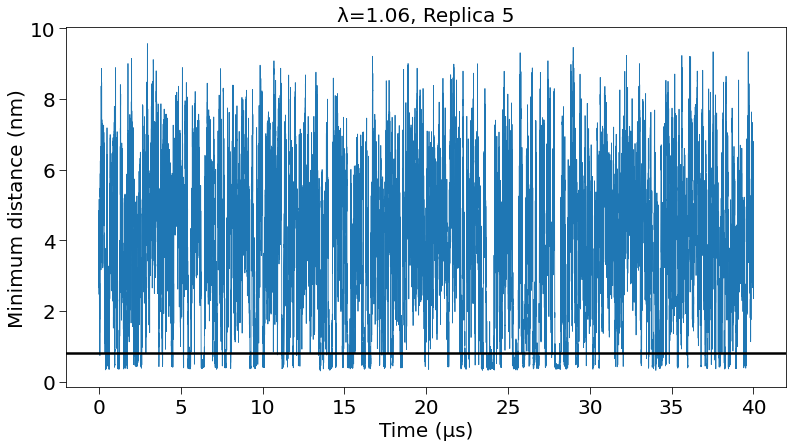

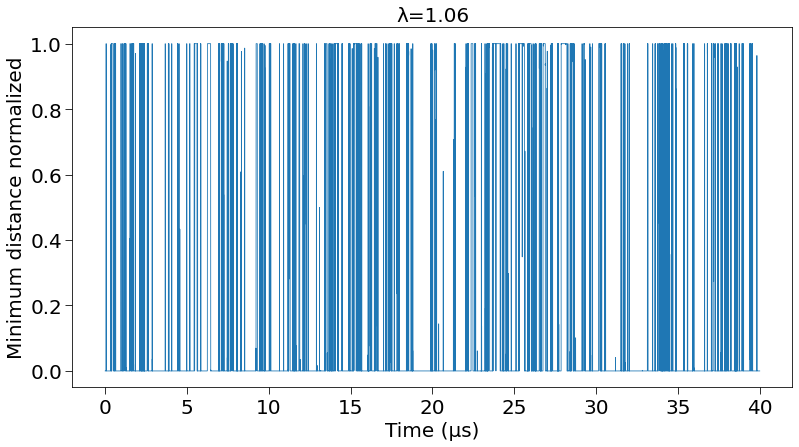

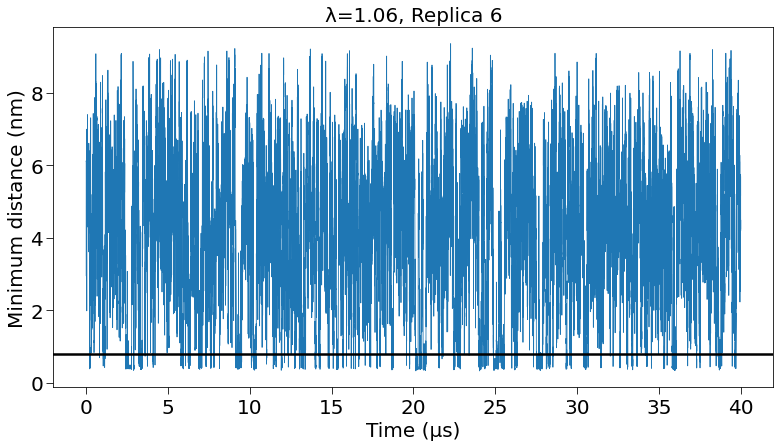

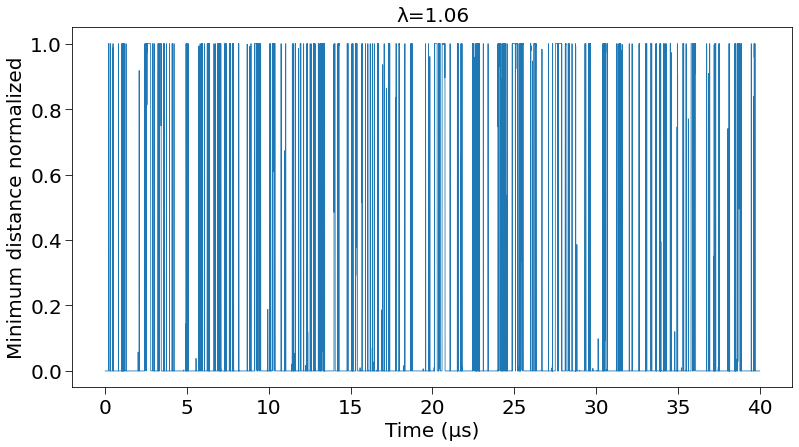

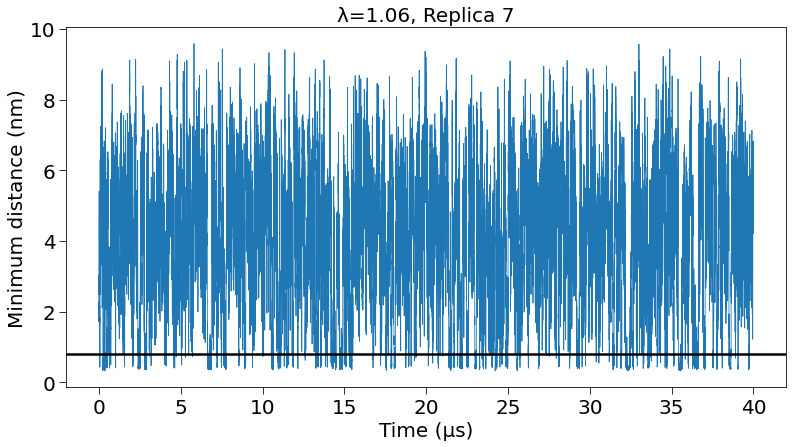

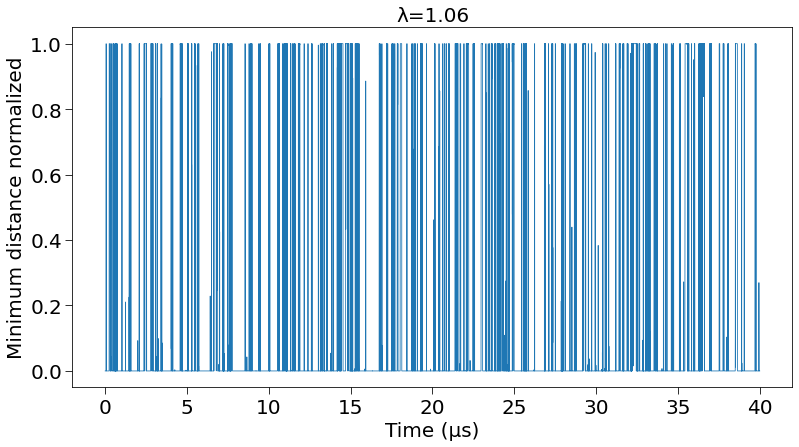

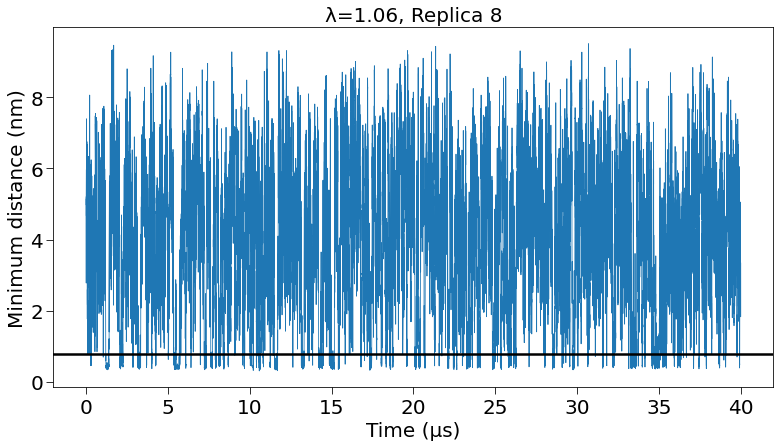

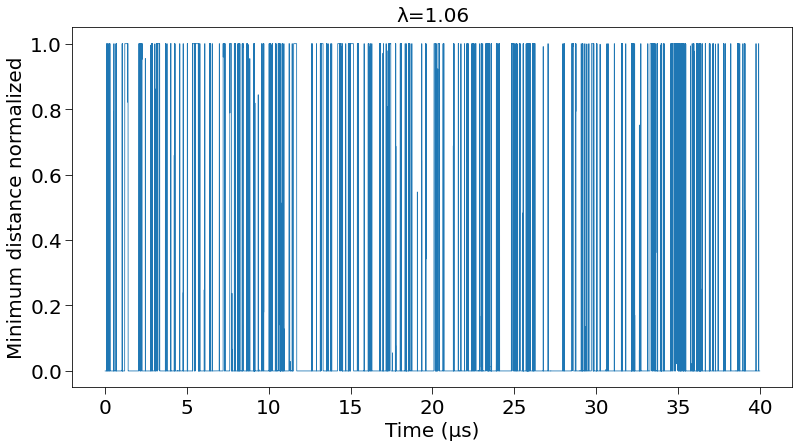

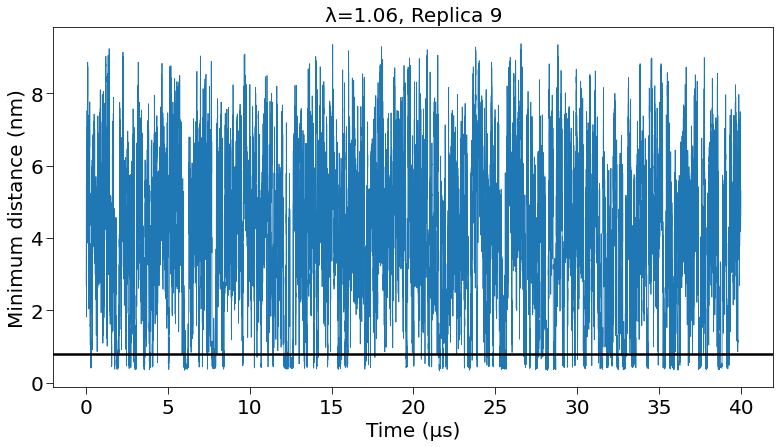

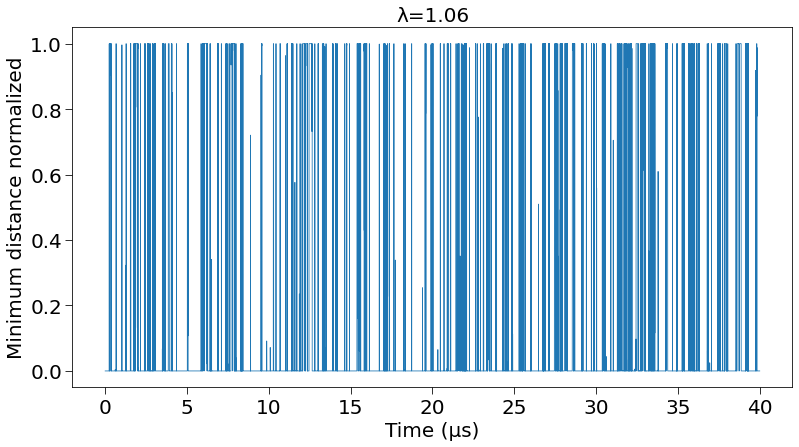

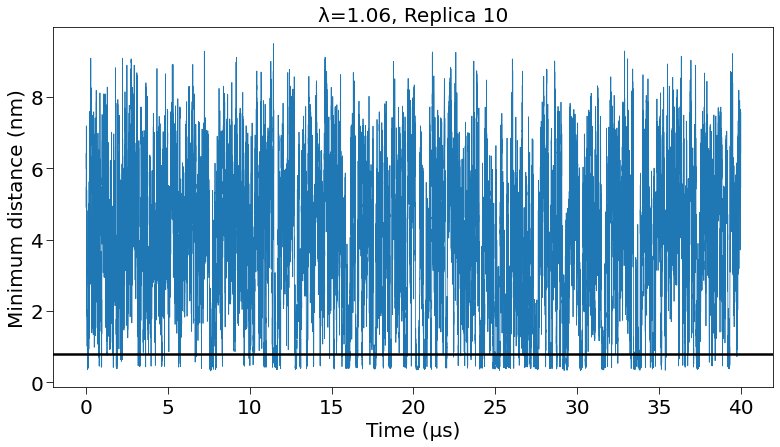

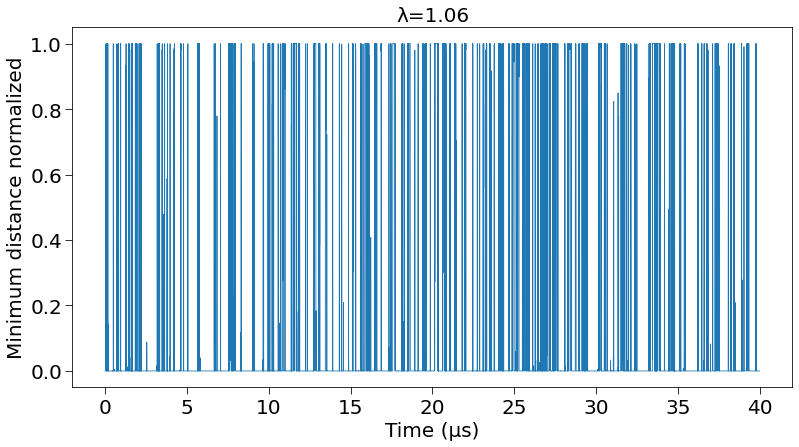

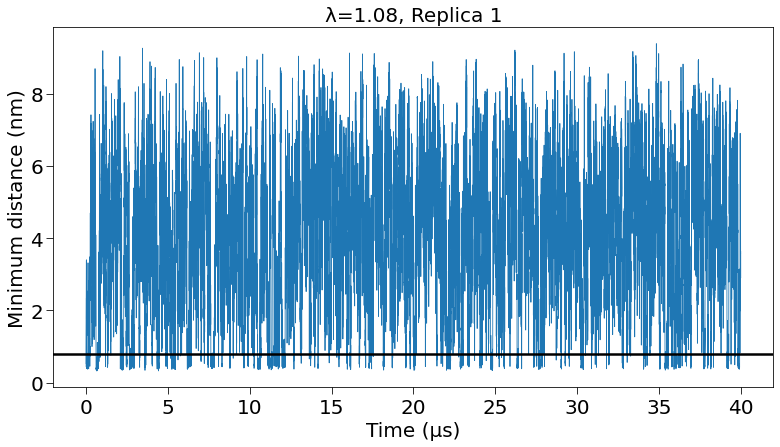

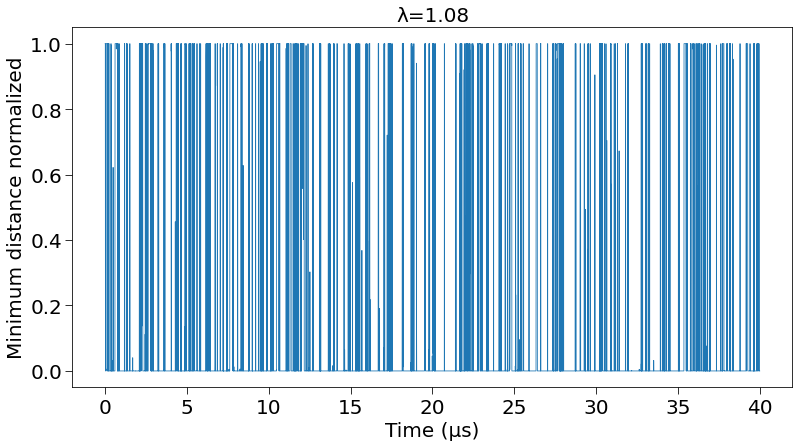

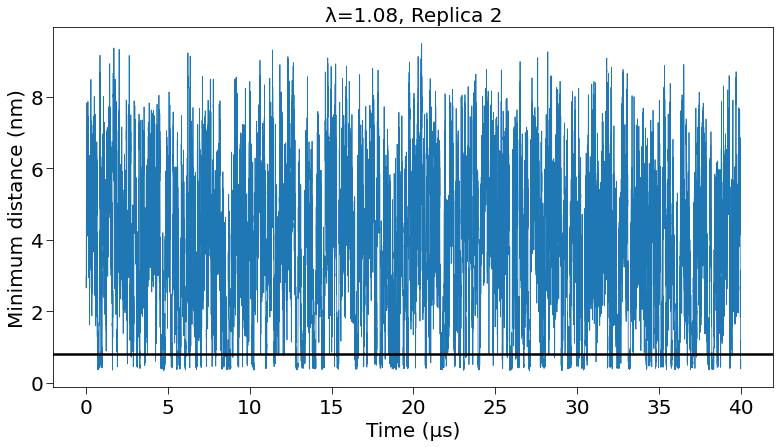

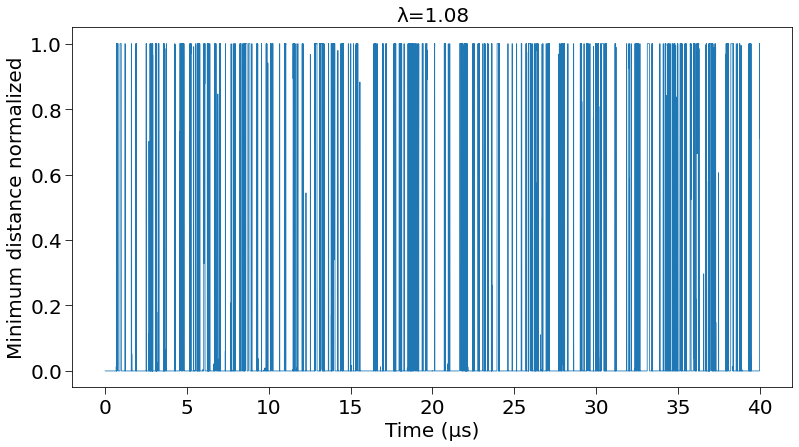

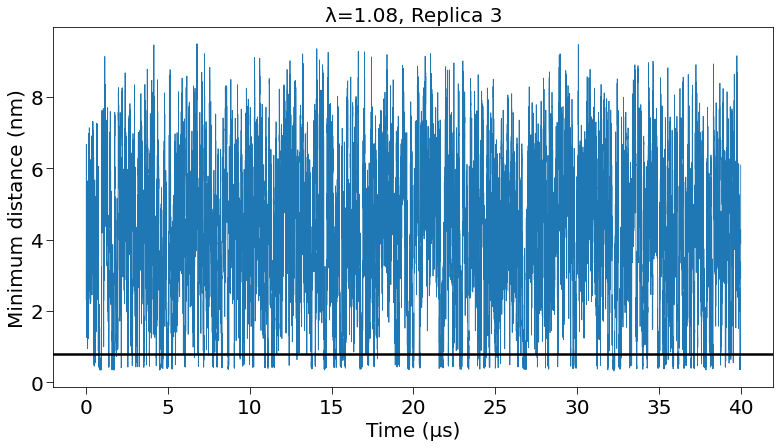

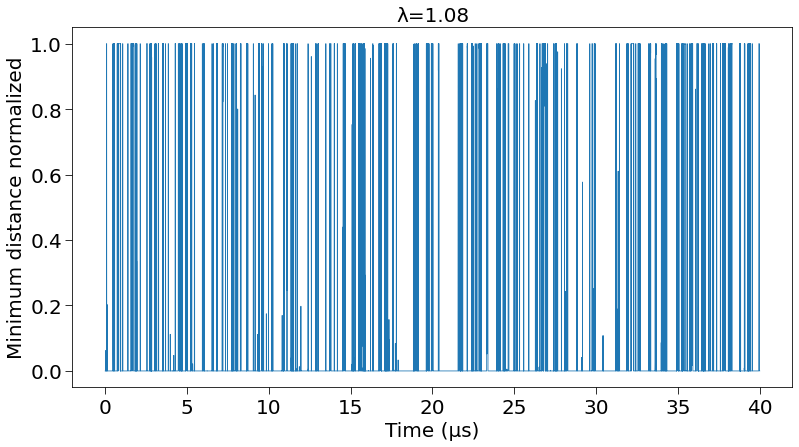

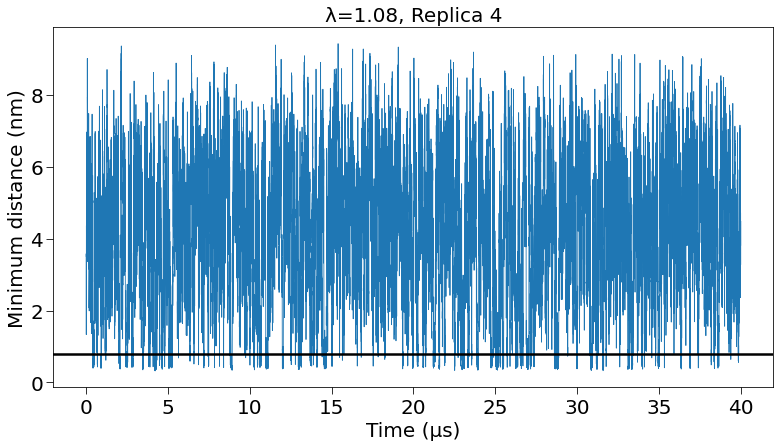

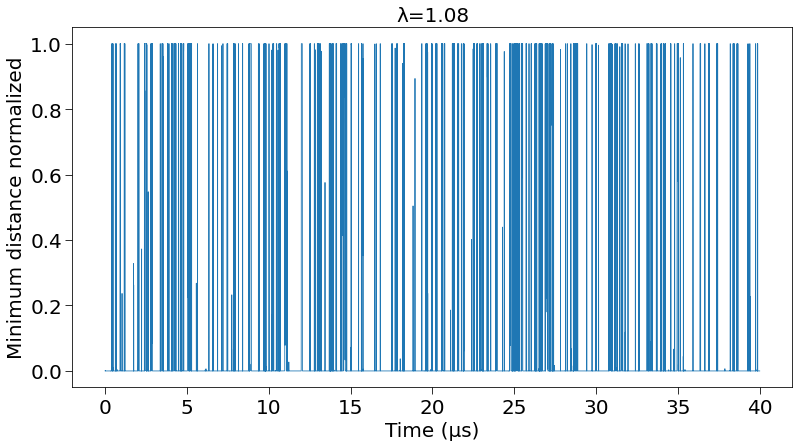

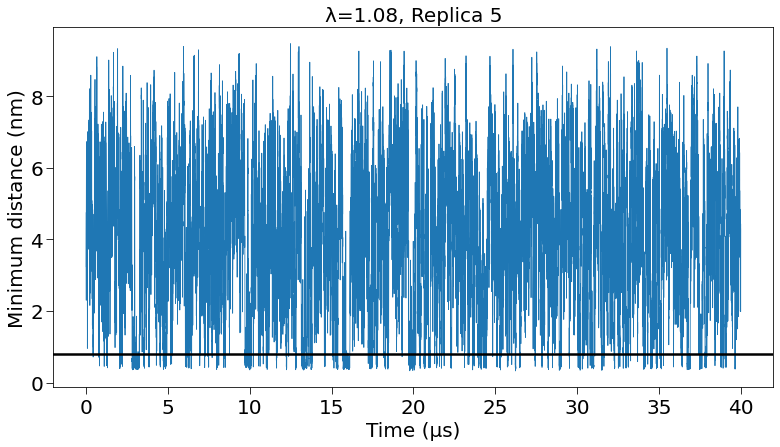

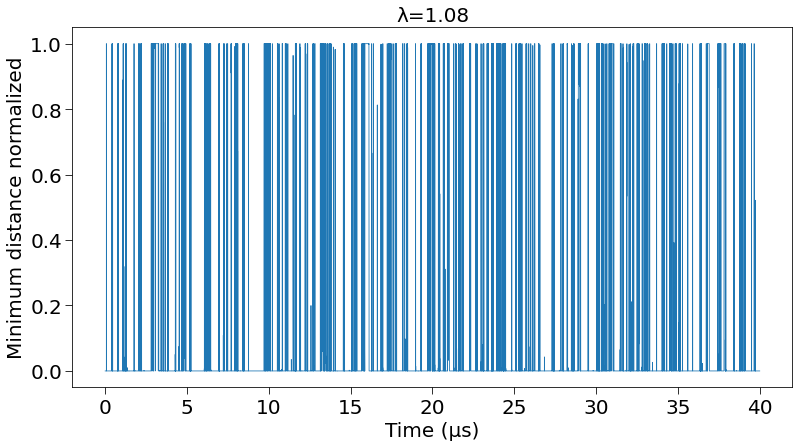

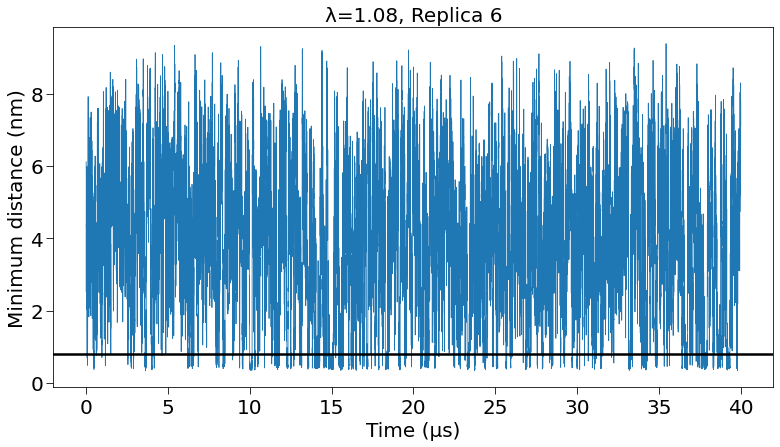

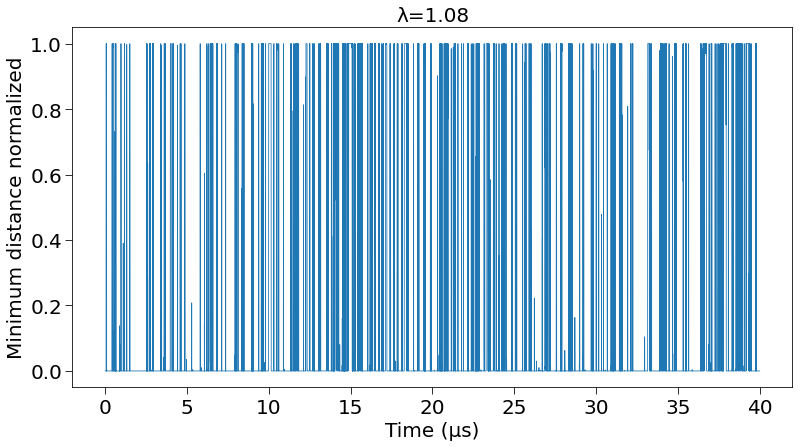

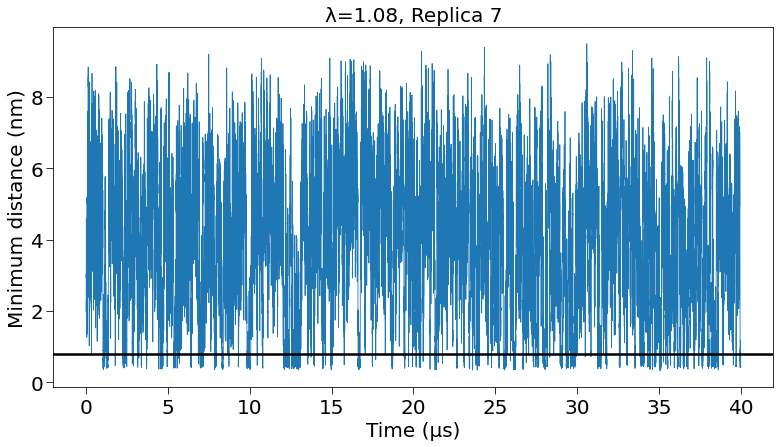

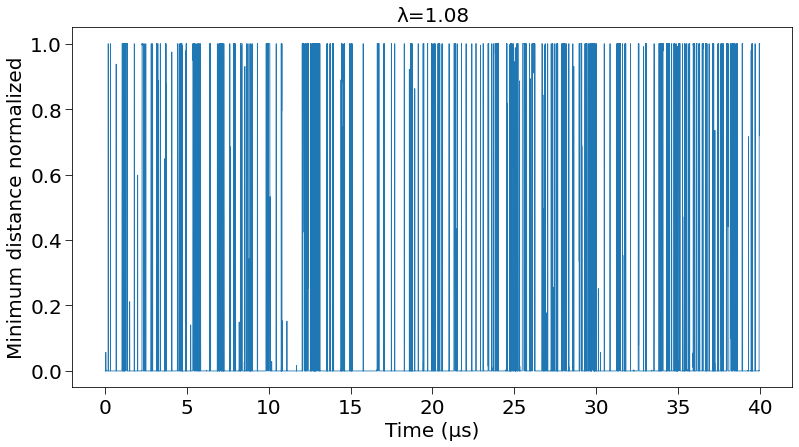

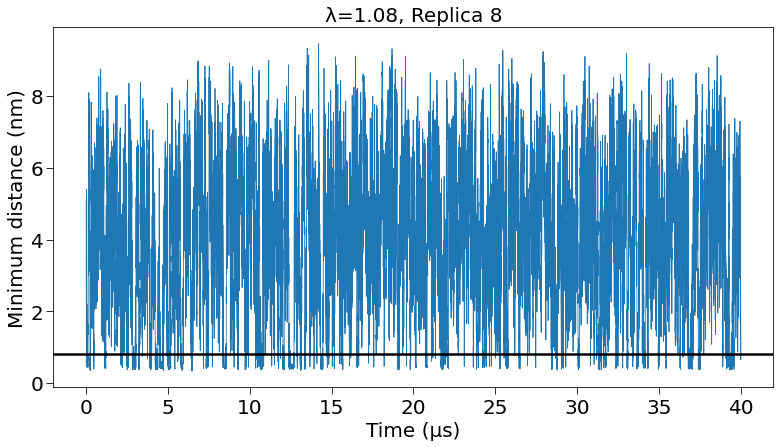

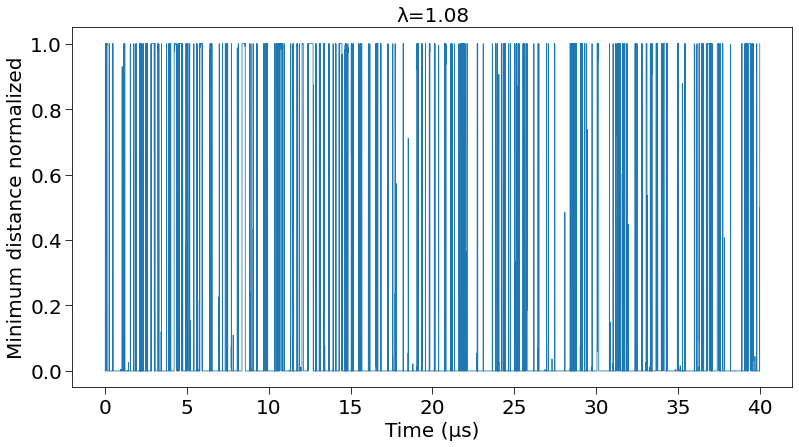

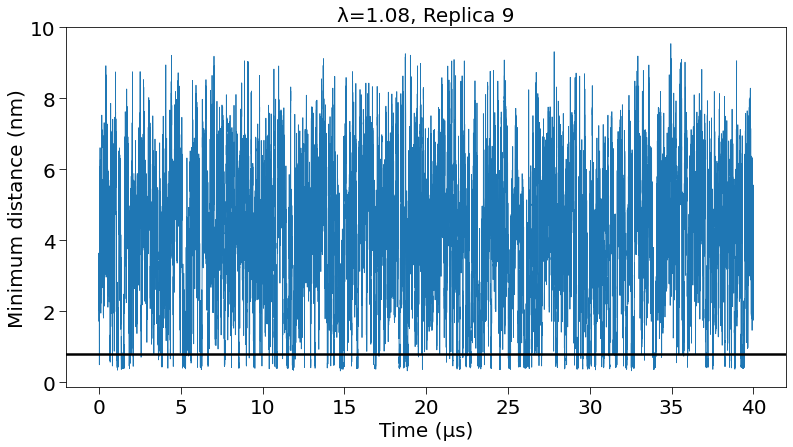

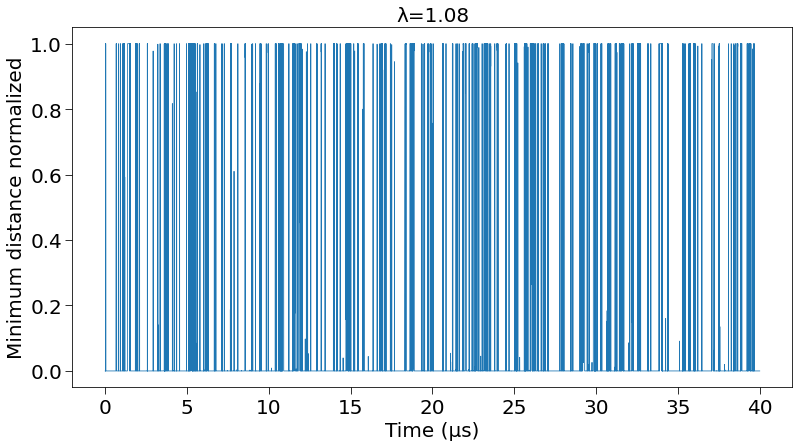

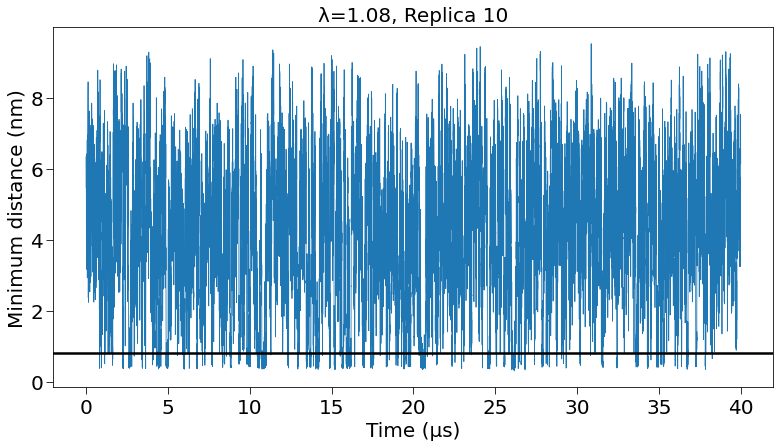

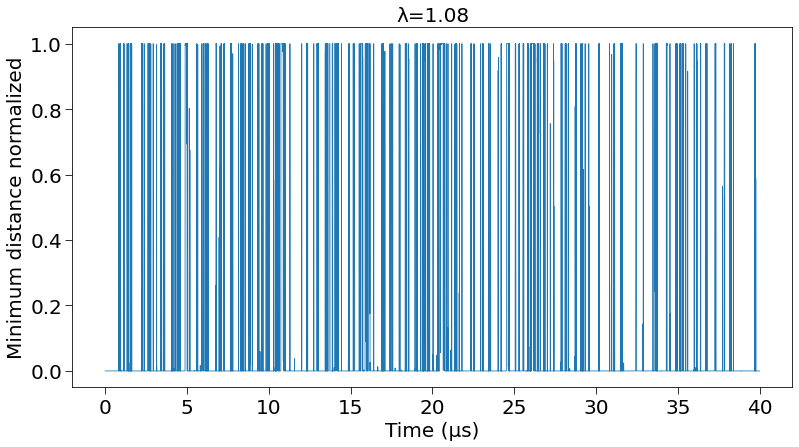

In [10]:
#Analyze fraction bound with single cut-off

fraction_bound_vs_lambda = []
fraction_bound_err_vs_lambda = []

#Loop over lambdas
for l in lambdas:
    
    fraction_bound_vs_replica = []
    
    #Loop over replicas
    for replica in range(replicas): 
    
        #Load data (minimum distance betweeen all beads)
        time, mindist = np.genfromtxt('two_ubq_%s/lambda_%s/data/ubq1_ubq2_mindist_lambda%s.xvg' % (str(replica+1),l,l), skip_header=24, usecols=(0,1), unpack=True)
        
        #Plot data initially
        fig= plt.figure(figsize=(10,5))
        axes= fig.add_axes([1,1,1,1])
        plt.plot(time, mindist, '-', linewidth = 0.8)
        plt.axhline(thresh, linewidth=2.5, color='black', alpha=1)
        plt.title(f'λ={l}, Replica {replica+1}', fontsize=20)
        plt.tick_params(colors='black', direction='out', length=7, labelsize=20)
        plt.ylabel('Minimum distance (nm)', fontsize=20)
        plt.xlabel('Time (µs)', fontsize=20)
        fig.savefig("figures/mindist_vs_time_lambda%s_replica%s.png" % (l,str(replica+1)), bbox_inches='tight', pad_inches=1, dpi=400)
        fig.savefig("figures/mindist_vs_time_lambda%s_replica%s.pdf" % (l,str(replica+1)), bbox_inches='tight', pad_inches=1, dpi=400)

        #Fermi transform to check for two states
        L=1.5
        B=50
        mindist_fermi = 1/(1+np.exp(B*(mindist-L*thresh)))

        #Plot data fermi transformed
        fig= plt.figure(figsize=(10,5))
        axes= fig.add_axes([1,1,1,1])
        plt.plot(time, mindist_fermi, '-', linewidth = 0.8)
        plt.title('λ=' + str(l), fontsize=20)
        plt.tick_params(colors='black', direction='out', length=7, labelsize=20)
        plt.ylabel('Minimum distance normalized', fontsize=20)
        plt.xlabel('Time (µs)', fontsize=20)
        fig.savefig("figures/mindist_vs_time_fermiswitch_lambda%s_replica%s.png" % (l,str(replica+1)), bbox_inches='tight', pad_inches=1, dpi=400)
        fig.savefig("figures/mindist_vs_time_fermiswitch_lambda%s_replica%s.pdf" % (l,str(replica+1)), bbox_inches='tight', pad_inches=1, dpi=400)
        
        #Count number of bound
        frames_bound = np.count_nonzero(mindist < thresh)
        #Get fraction bound
        fraction_bound = frames_bound/len(mindist)
        #Append to list
        fraction_bound_vs_replica.append(fraction_bound)
        
    #Average over replicas
    fraction_bound_avg = np.average(fraction_bound_vs_replica)
    fraction_bound_vs_lambda.append(fraction_bound_avg)

    #Get SEM over replicas
    fraction_bound_err = np.std(fraction_bound_vs_replica)/np.sqrt(np.size(fraction_bound_vs_replica))
    fraction_bound_err_vs_lambda.append(fraction_bound_err)


In [11]:
#Calculate fraction bound based on experimental Kd and average box volume over all replicas for each lambda

real_fraction_bound_vs_lambda = []

#Loop over lambdas
for l in lambdas:
    avg_volume = 0
    
    #Loop over replicas
    for i in range(replicas):
        
        #Get volume time-series
        volume = np.genfromtxt('two_ubq_%s/lambda_%s/pVTE.xvg' % (str(i+1),l), skip_header=27, usecols=4, unpack=True)
        #Average and add to running sum
        avg_volume += np.average(volume)
    
    #Get average volume and convert to liters
    avg_volume = avg_volume/replicas
    vol_liters = avg_volume*((10**-9)**3)*(10**3)
    
    #Calculate protein concentration (2 copies)
    avogadros = 6.022*(10**23)
    conc = ((2/avogadros)/vol_liters)*(10**3)
    
    #Get fraction bound (experimental)
    real_fraction_bound = conc/(1+Kd_exp)
    real_fraction_bound_vs_lambda.append(real_fraction_bound) 

[0.42166695832604184, 0.10678483037924051, 0.08856528586785331]
[0.016773859866781017, 0.0034590052589802407, 0.0034319617858527434]


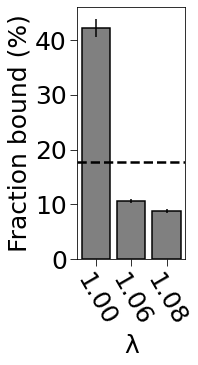

In [12]:
#Plot fraction bound bar plot
fig= plt.figure(figsize=(1.5,3.5))
axes= fig.add_axes([1,1,1,1])
plt.bar(lambdas, np.array(fraction_bound_vs_lambda)*100, yerr=np.array(fraction_bound_err_vs_lambda)*100, align='center', width = 0.8, color='gray', edgecolor='black', linewidth=1.5)
plt.axhline(np.average(real_fraction_bound_vs_lambda)*100, linewidth=2.5, color='black', linestyle="--")
plt.tick_params(colors='black', direction='out', length=7, labelsize=25)
plt.tick_params(axis='x', colors='black', direction='out', length=7, labelsize=25, rotation=-60)
plt.ylabel('Fraction bound (%)', fontsize=25)
plt.xlabel('λ', fontsize=25)

#Save figure
fig.savefig("figures/fractionbound_vs_lambda_allbeads.png", bbox_inches='tight', pad_inches=1, dpi=400)
fig.savefig("figures/fractionbound_vs_lambda_allbeads.pdf", bbox_inches='tight', pad_inches=1, dpi=400)

#Print fraction bound and error
print(fraction_bound_vs_lambda)
print(fraction_bound_err_vs_lambda)

# Fraction bound with mindist between binding site beads only

/lindorffgrp-isilon/thomasen/software/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


[0.041851453713657165, 0.004289892752681183, 0.003924901877453064]
[0.004830890314978419, 0.0003678426762947812, 0.00028567187388333894]


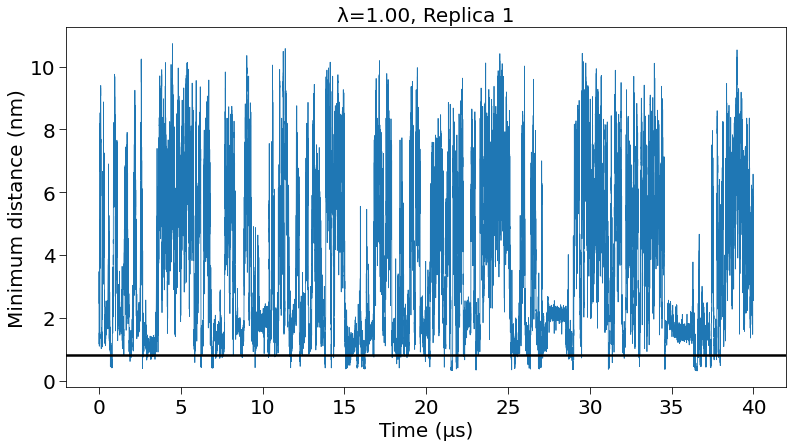

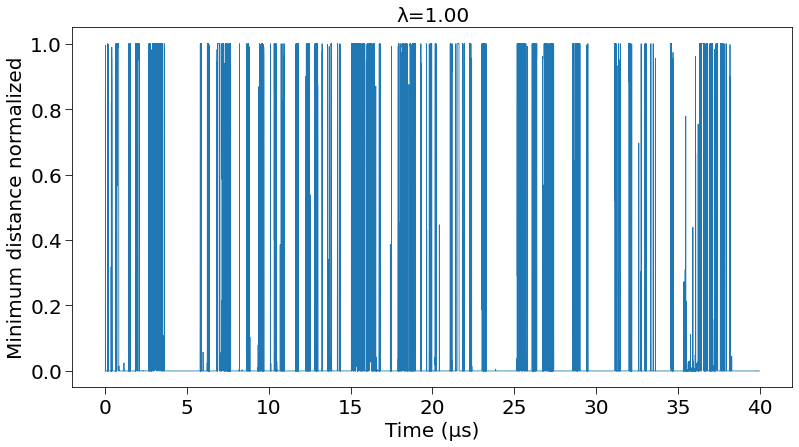

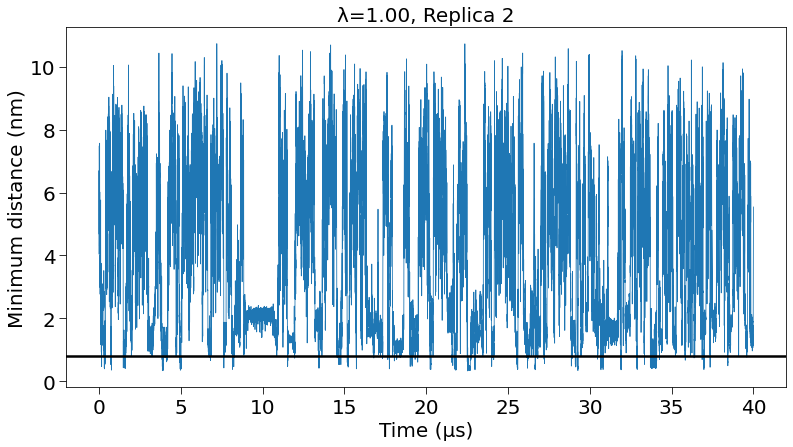

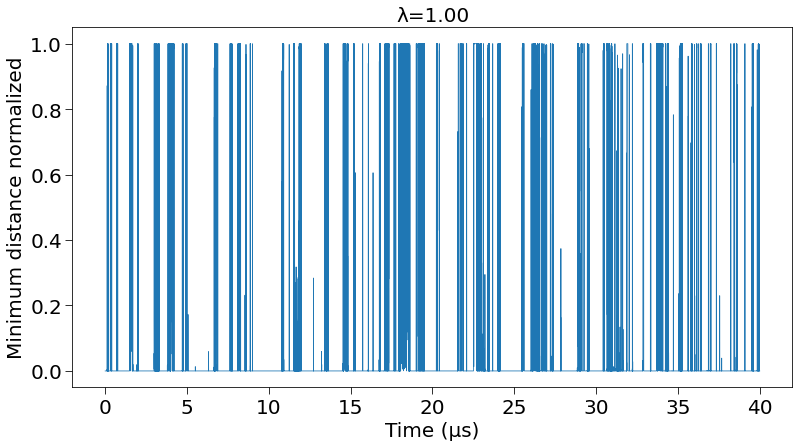

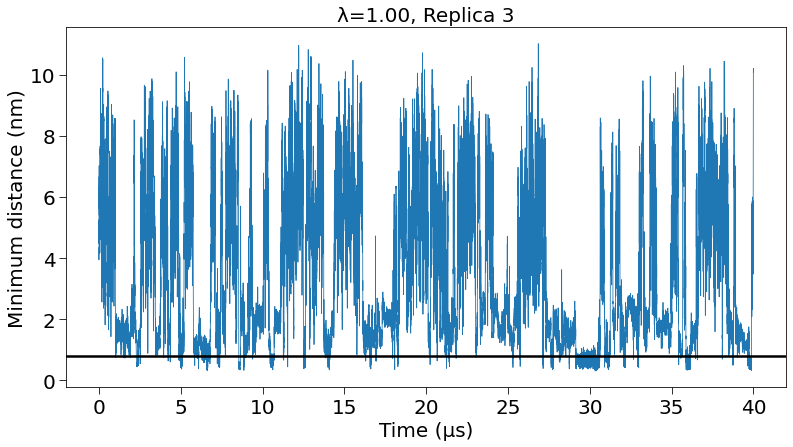

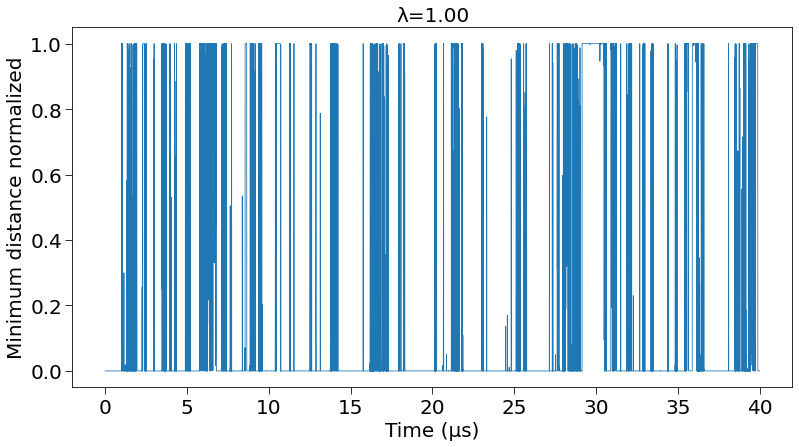

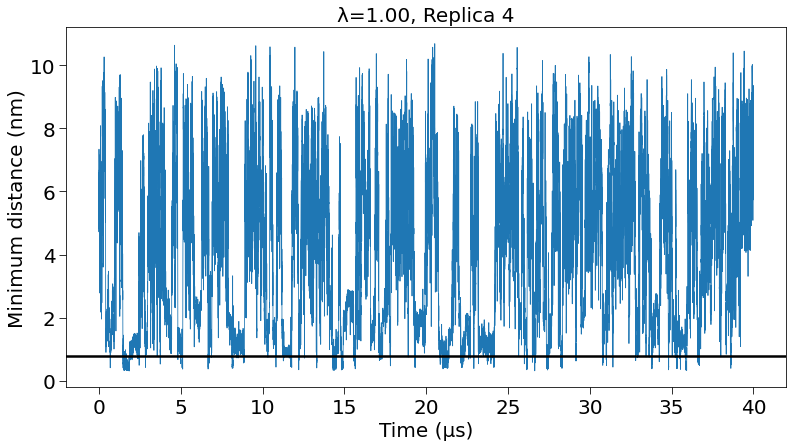

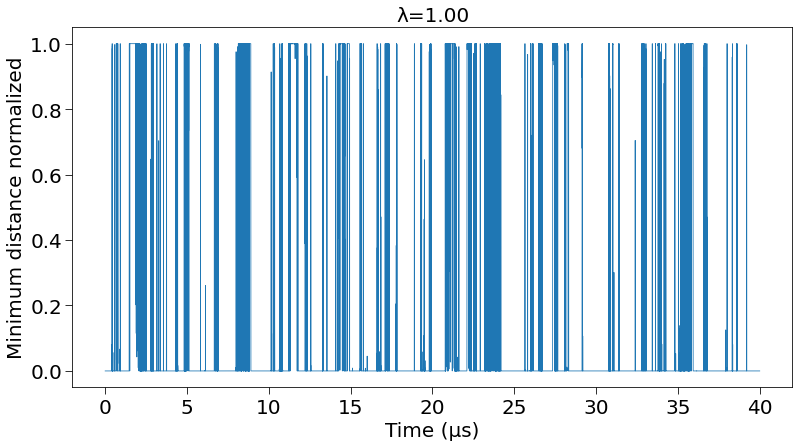

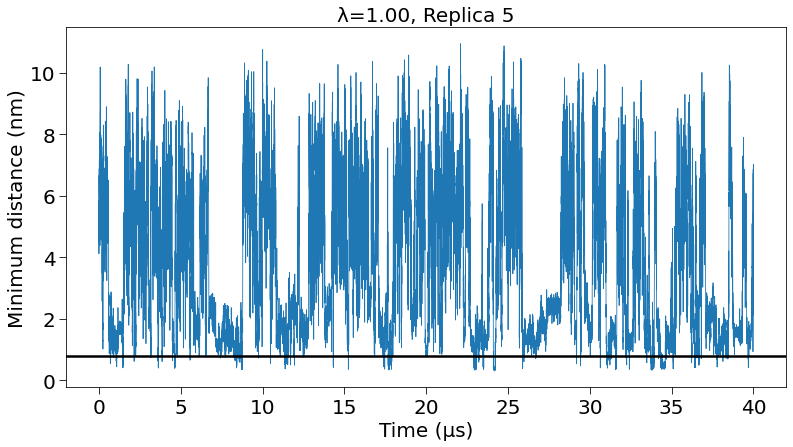

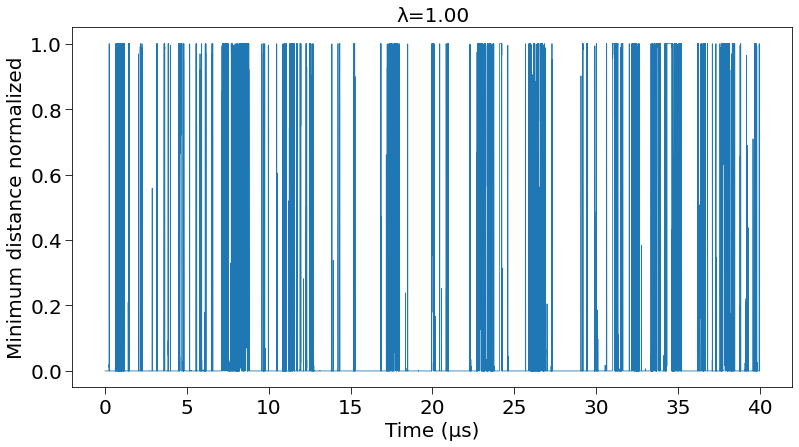

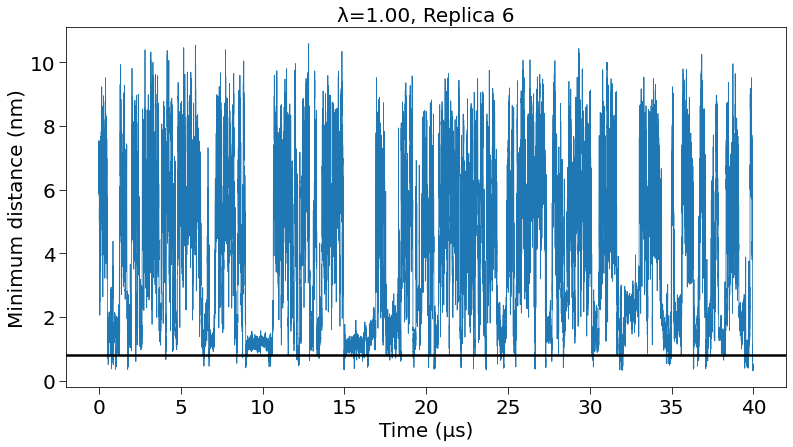

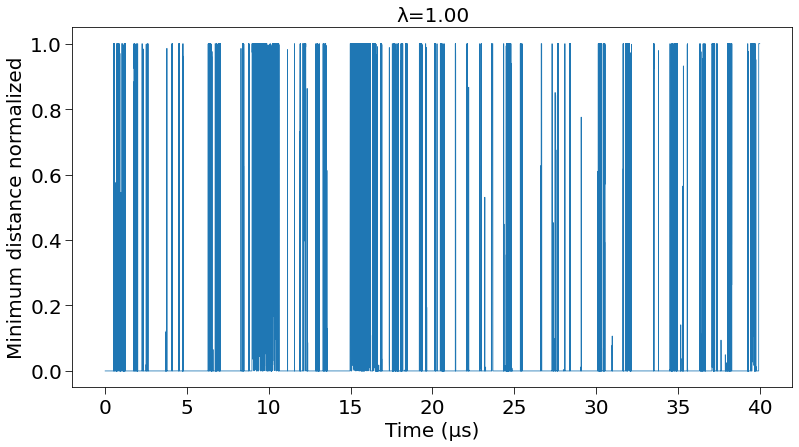

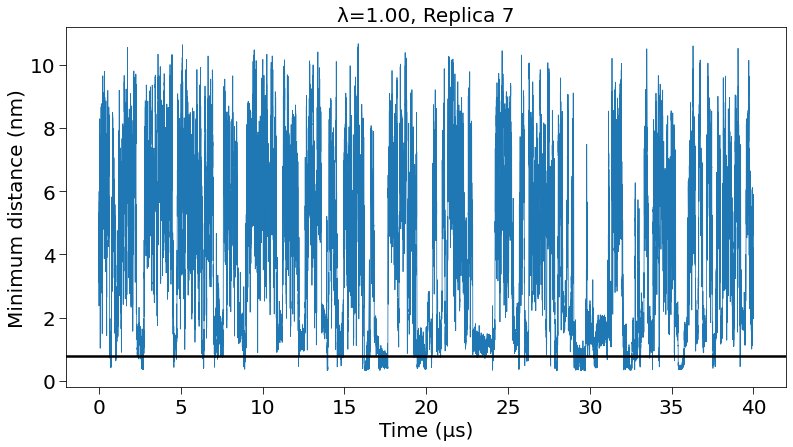

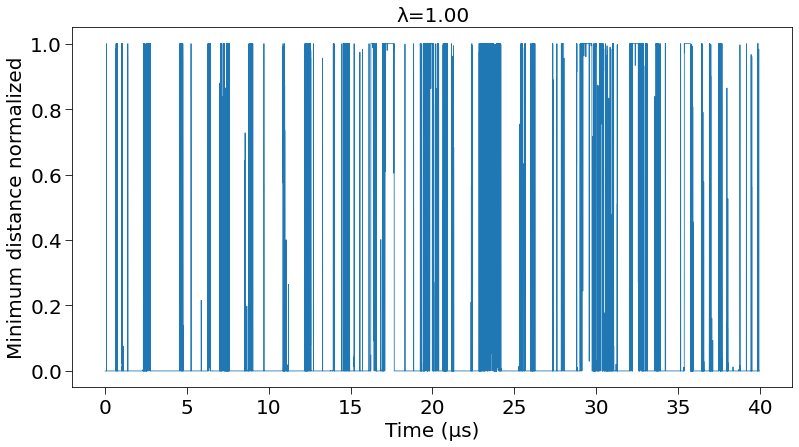

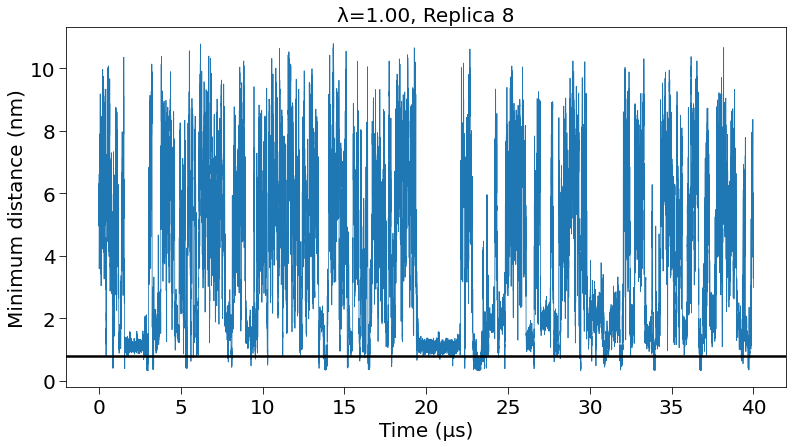

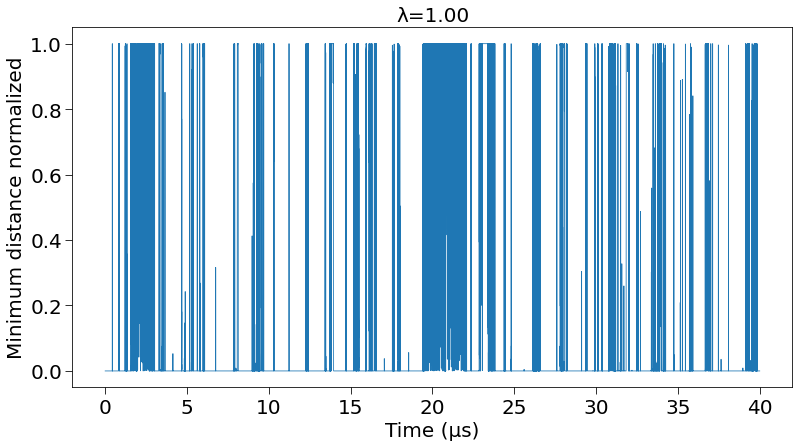

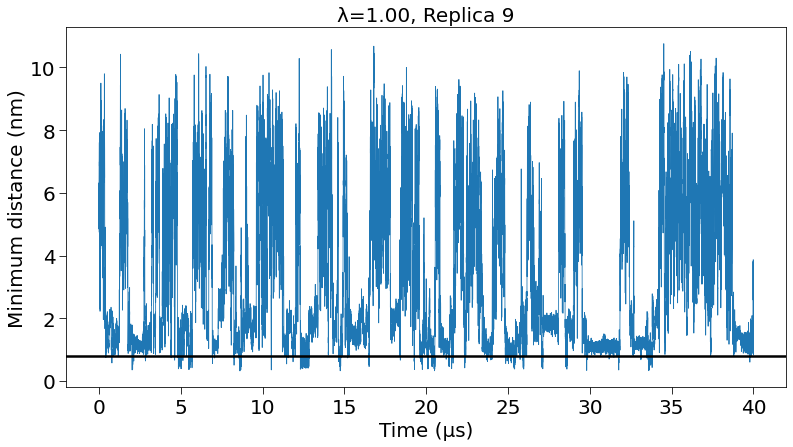

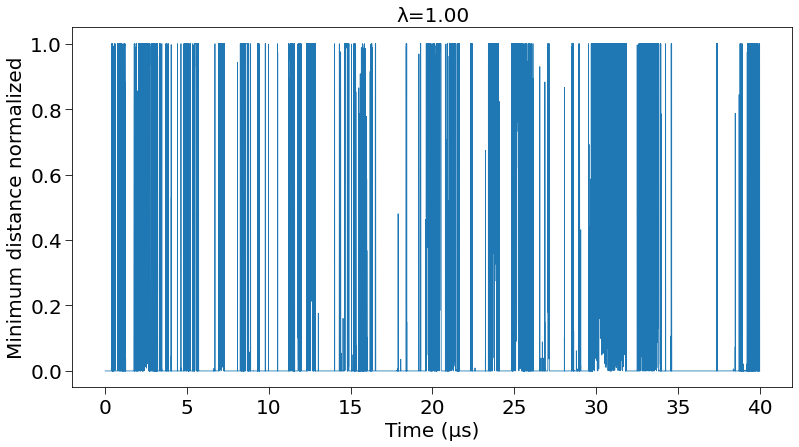

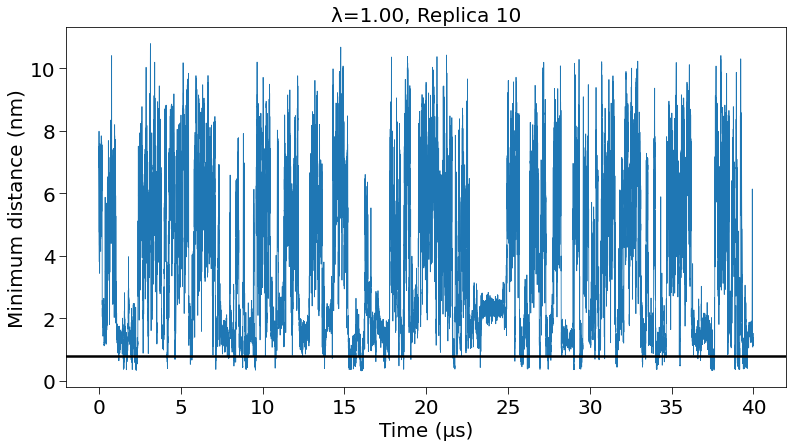

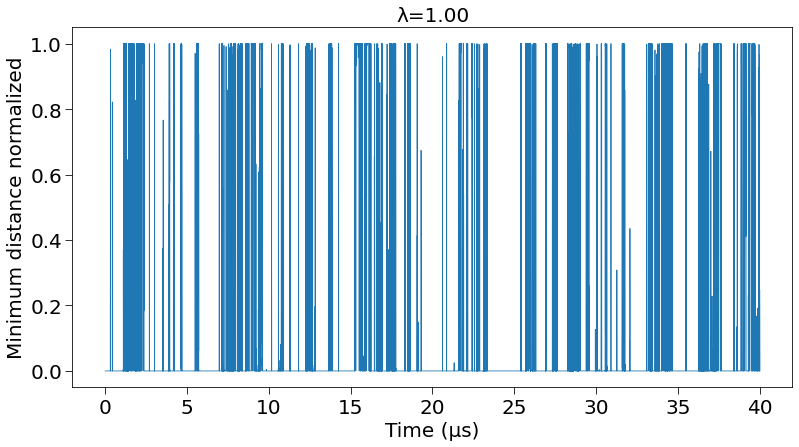

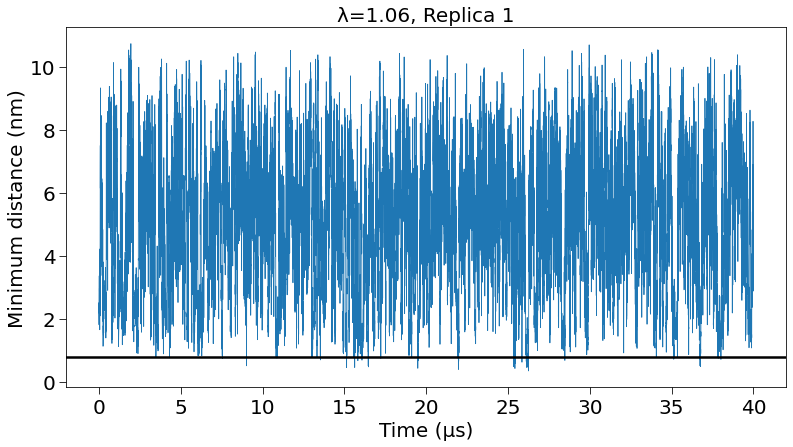

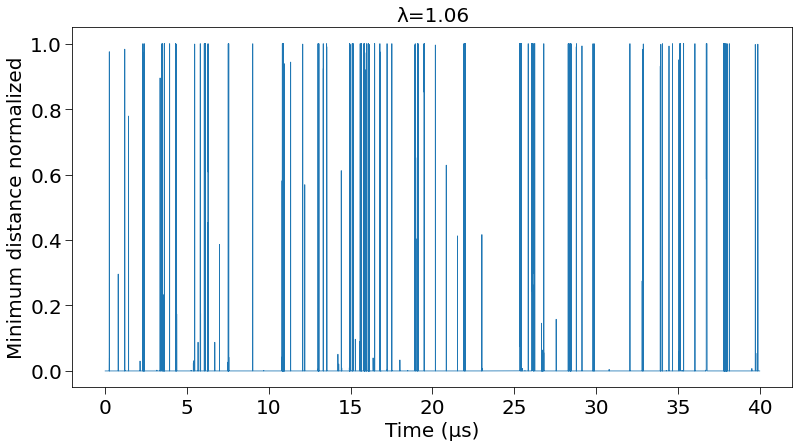

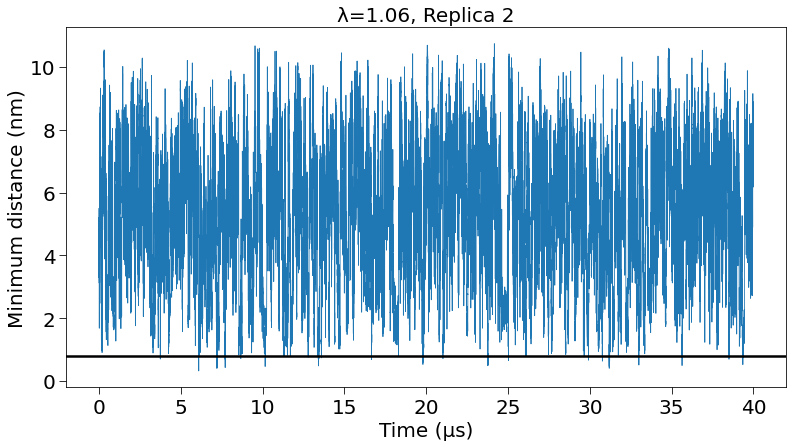

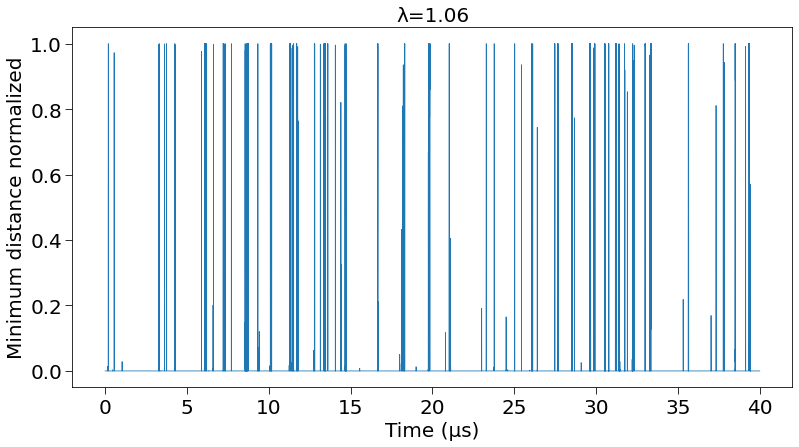

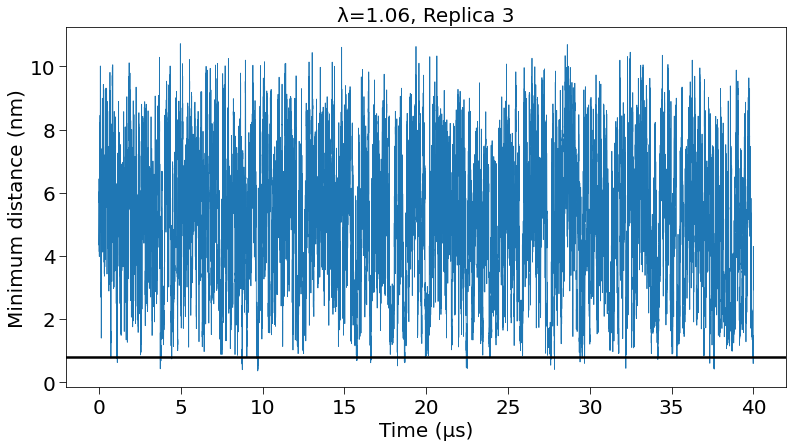

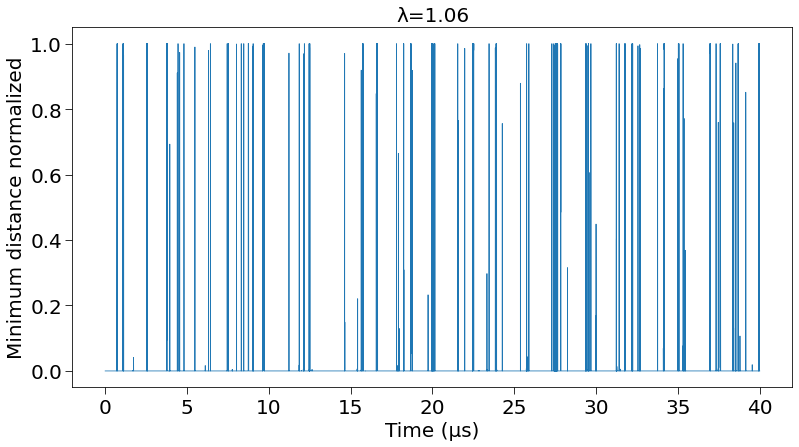

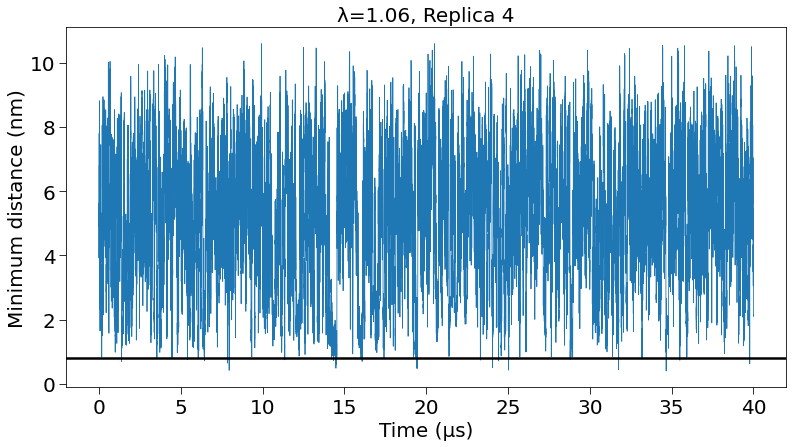

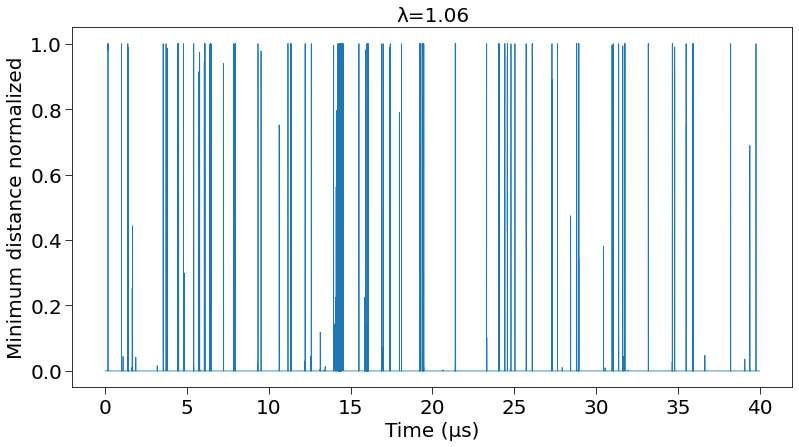

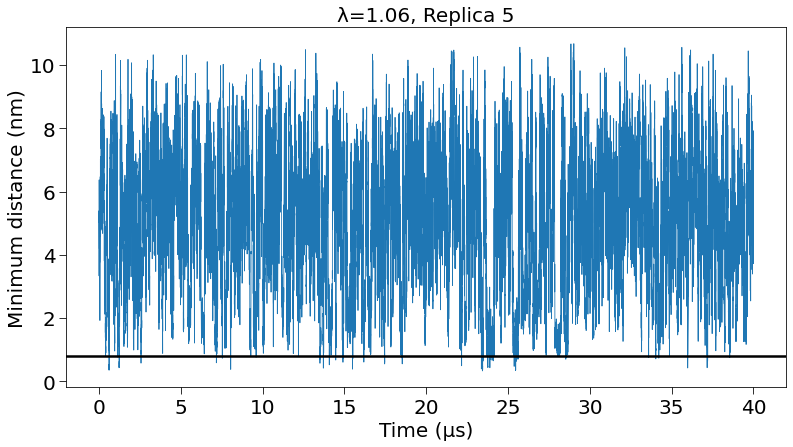

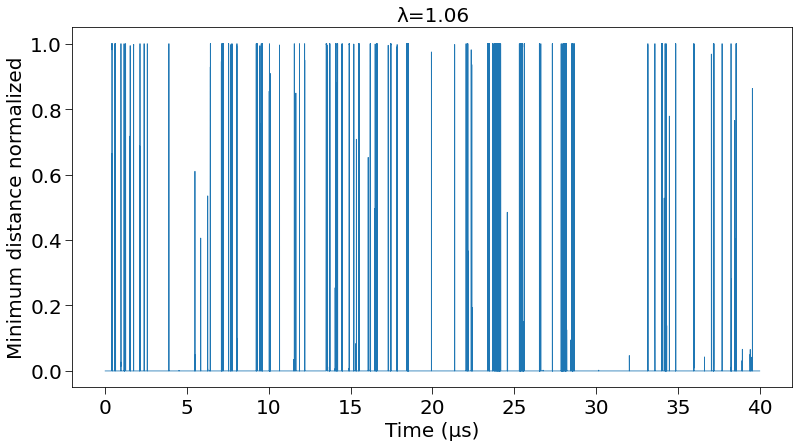

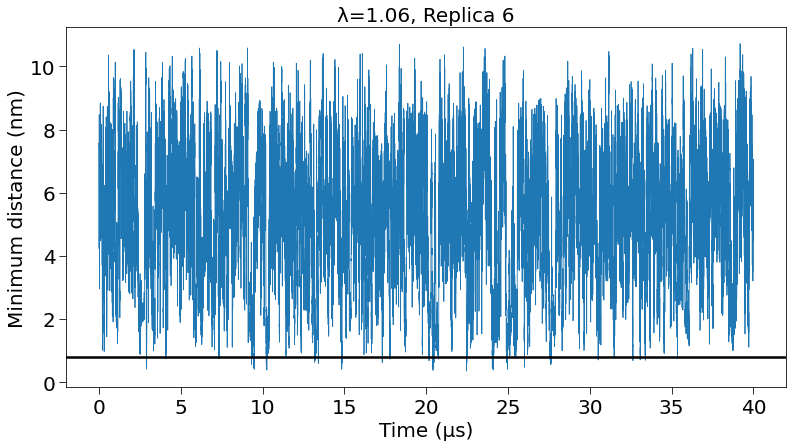

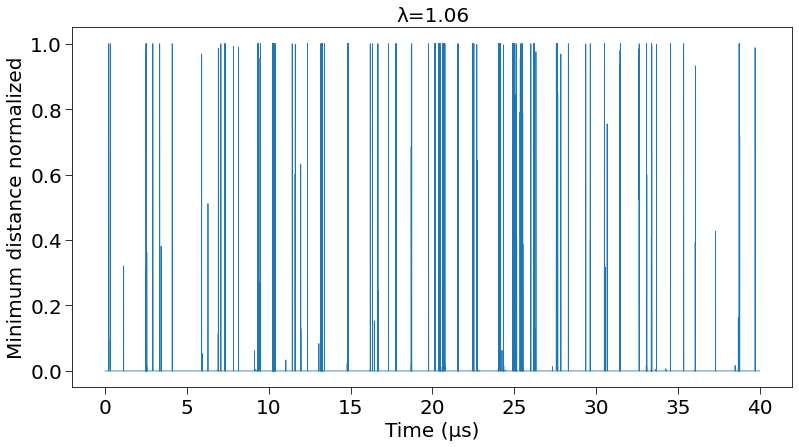

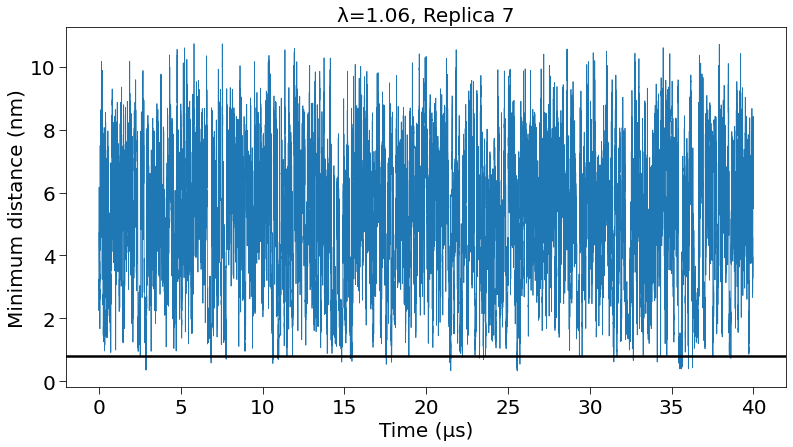

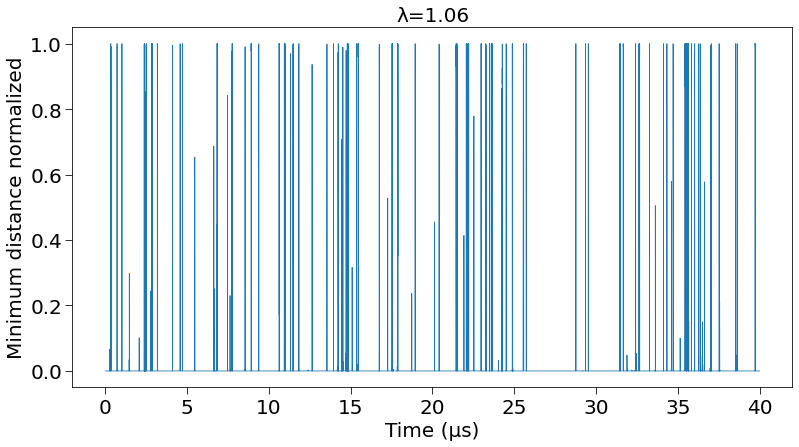

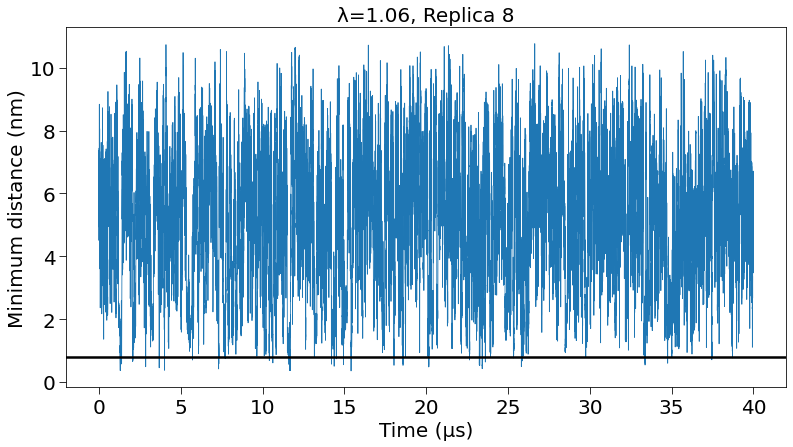

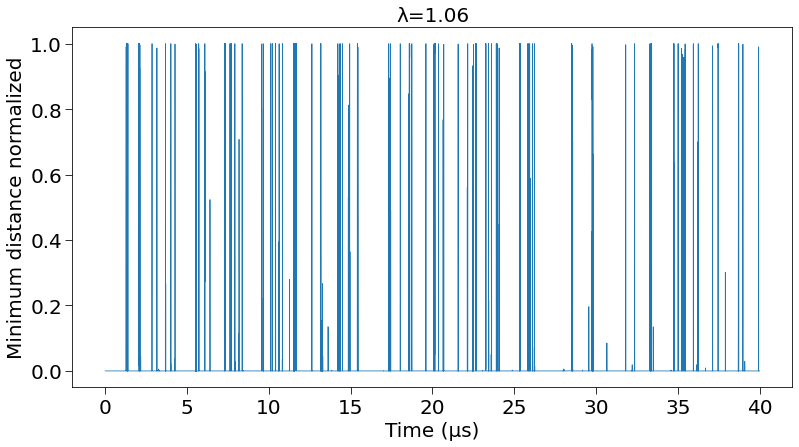

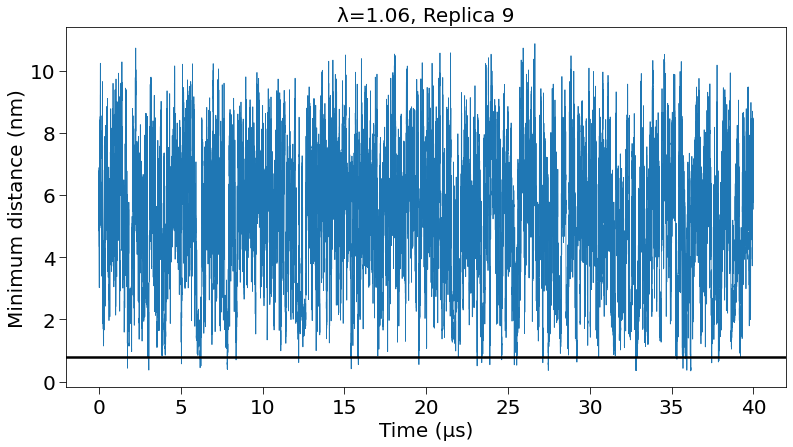

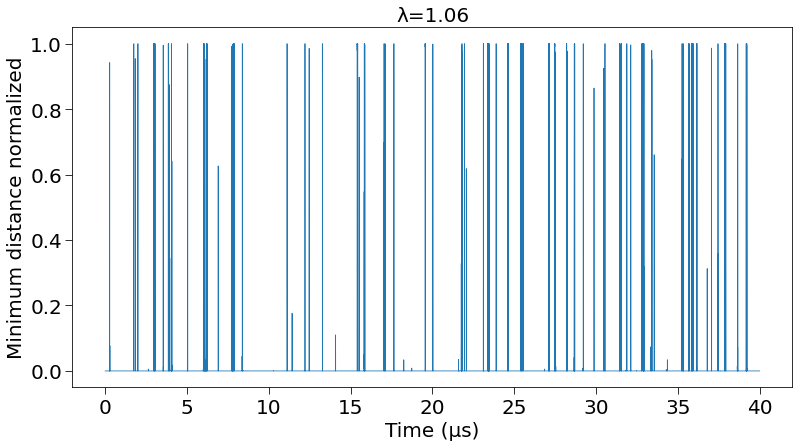

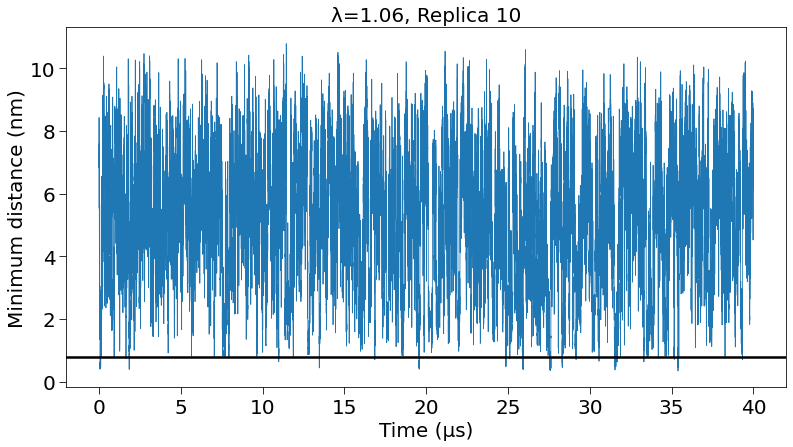

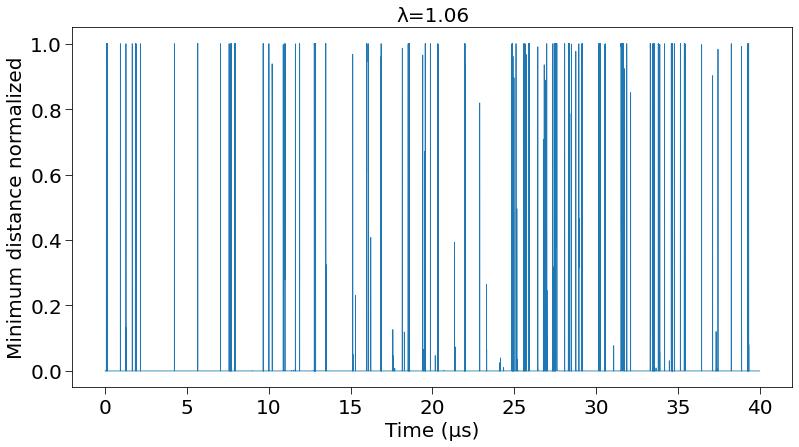

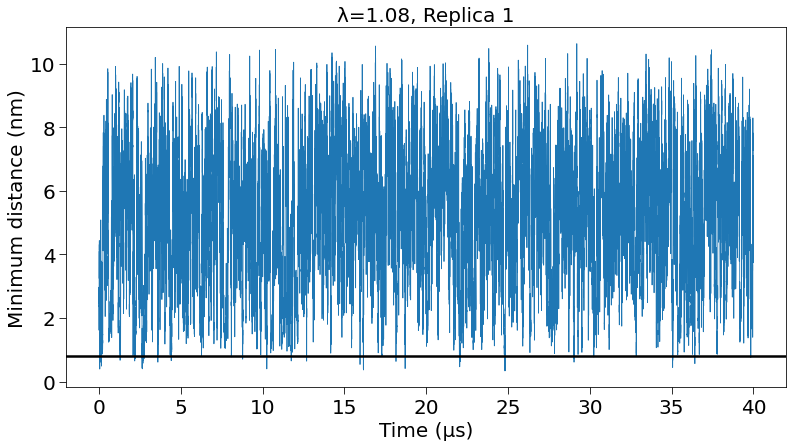

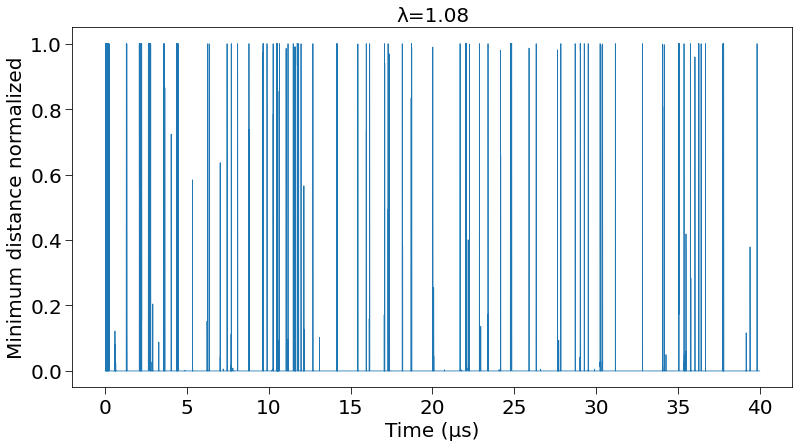

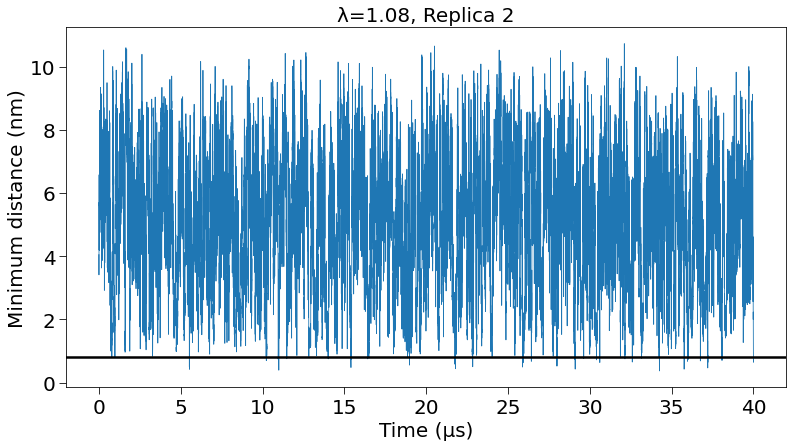

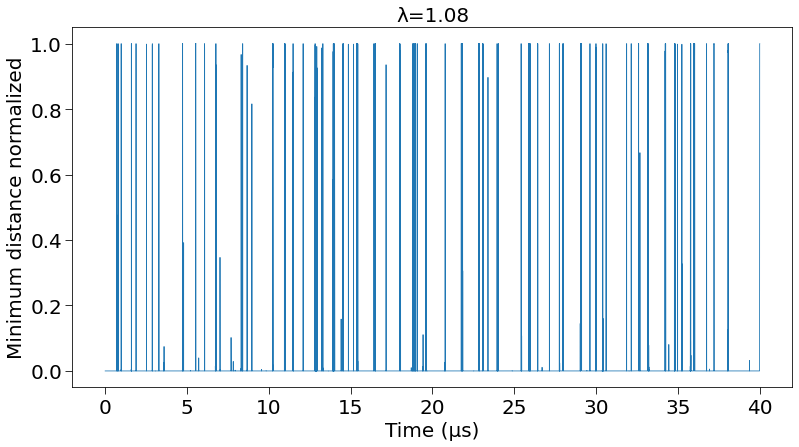

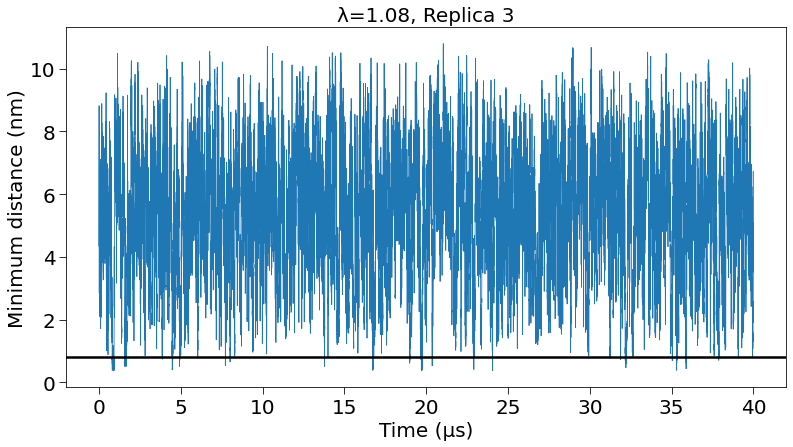

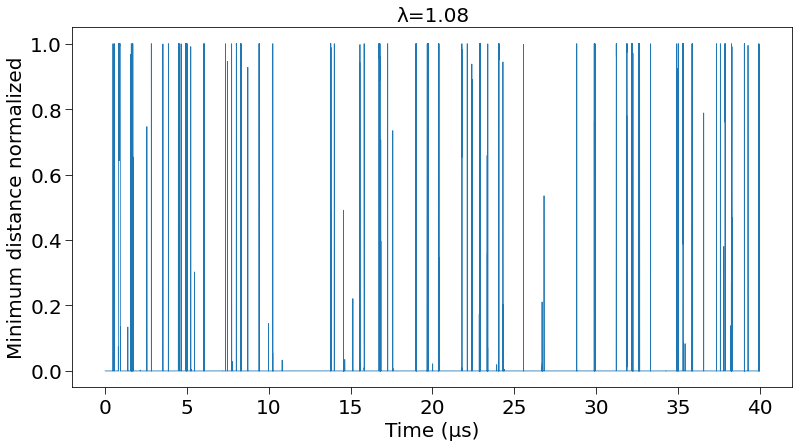

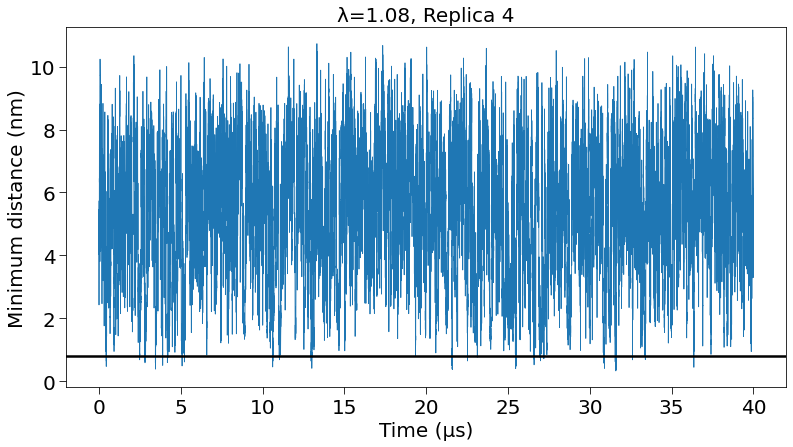

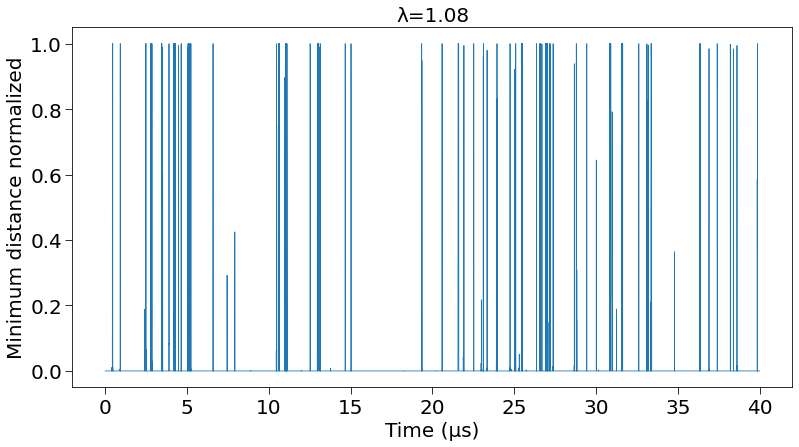

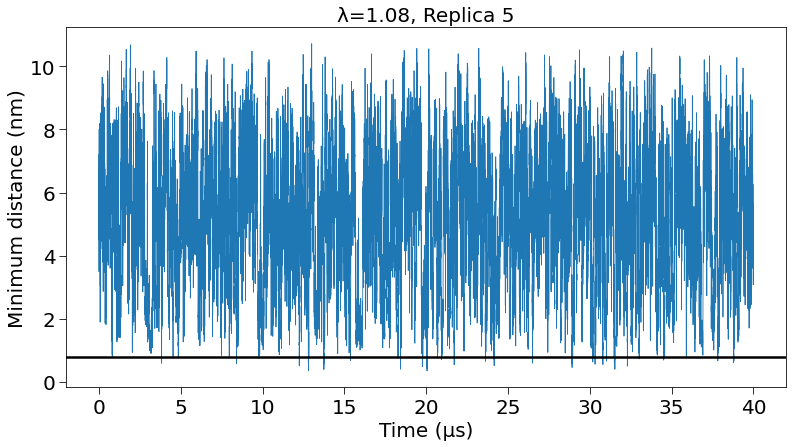

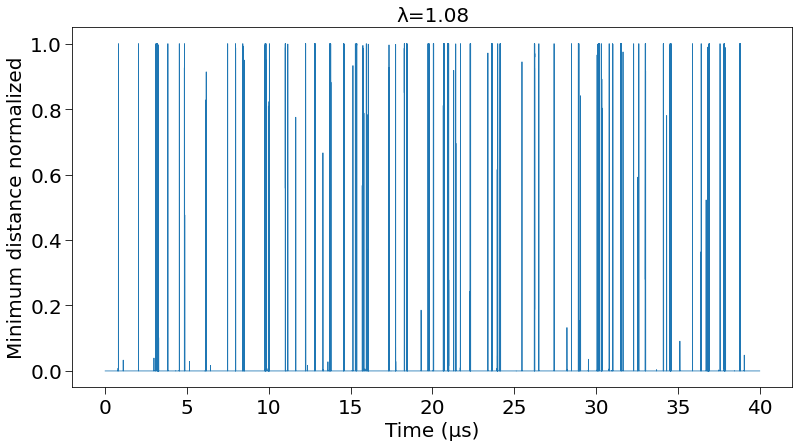

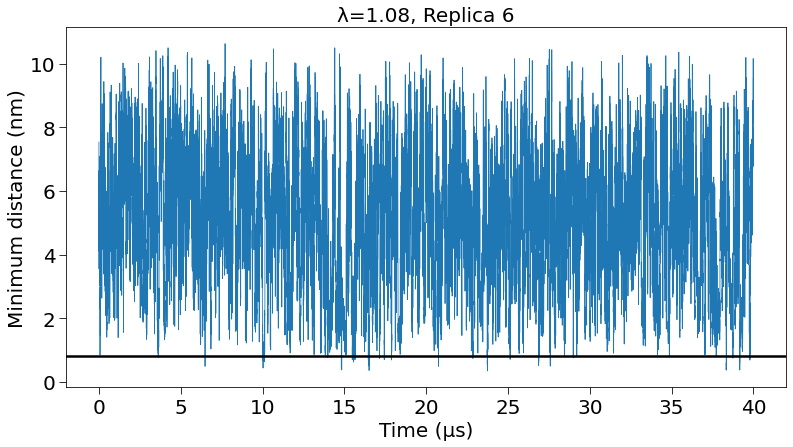

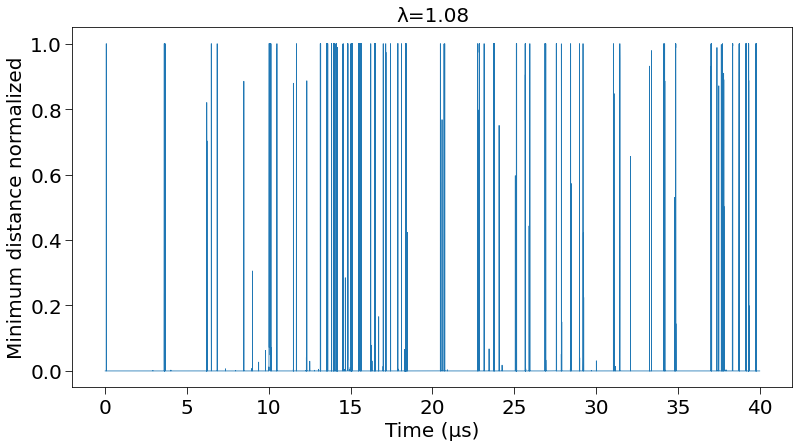

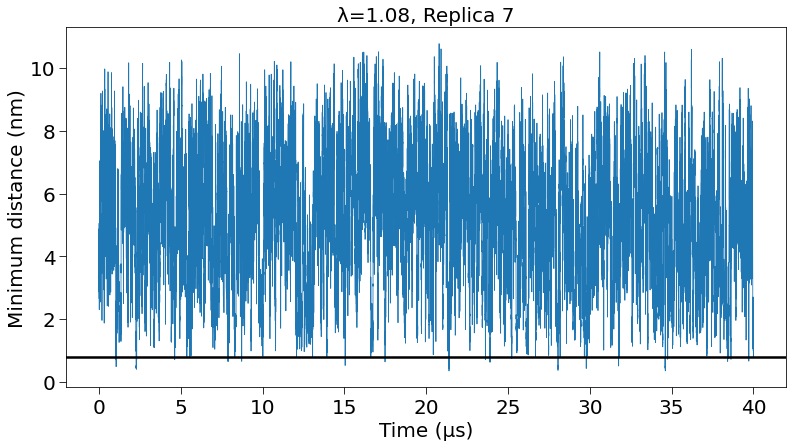

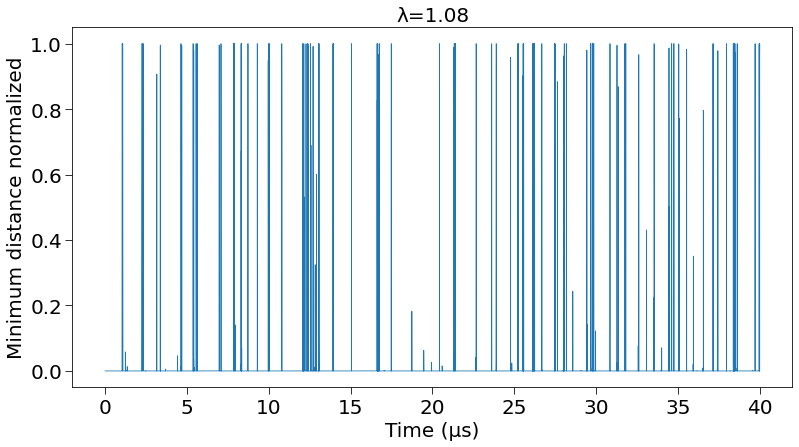

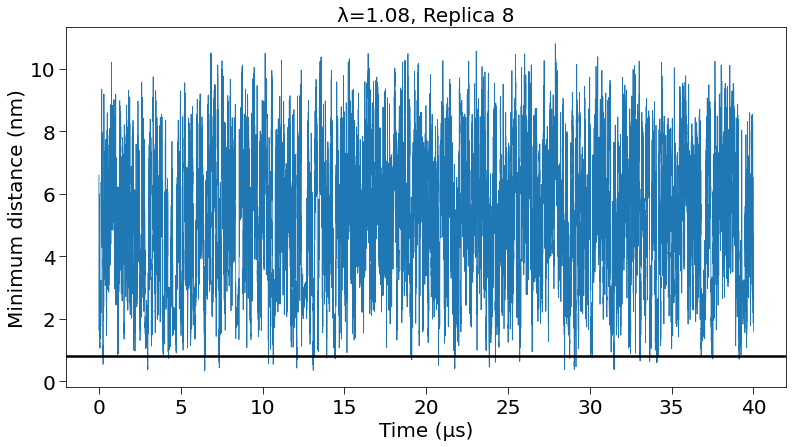

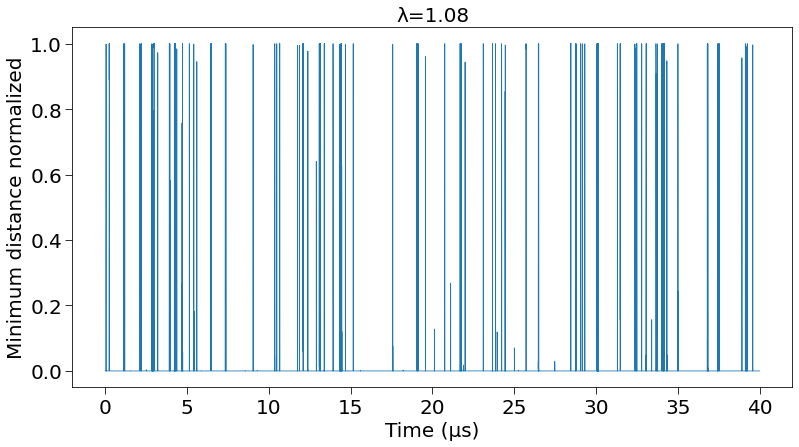

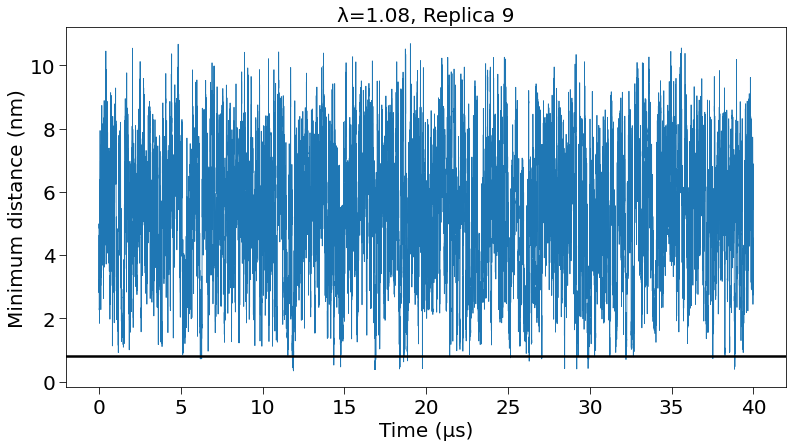

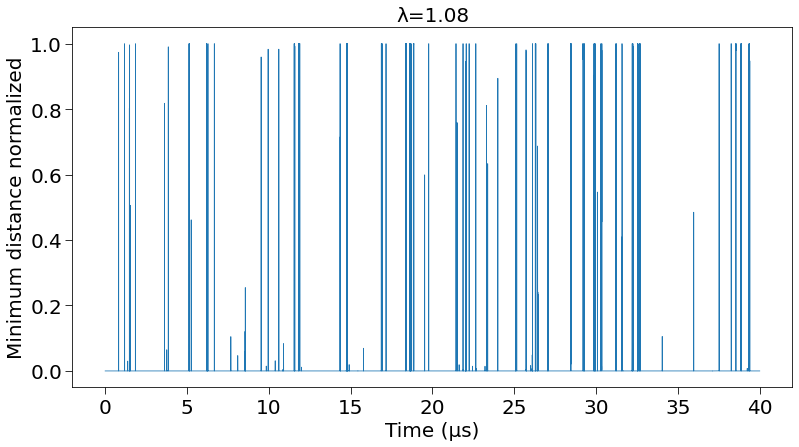

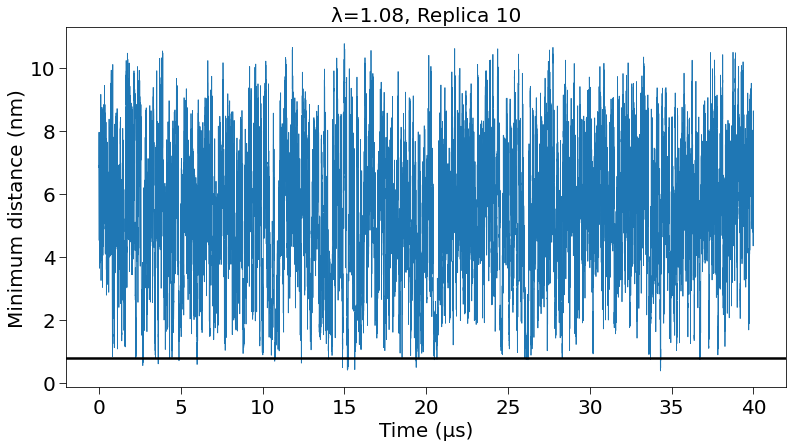

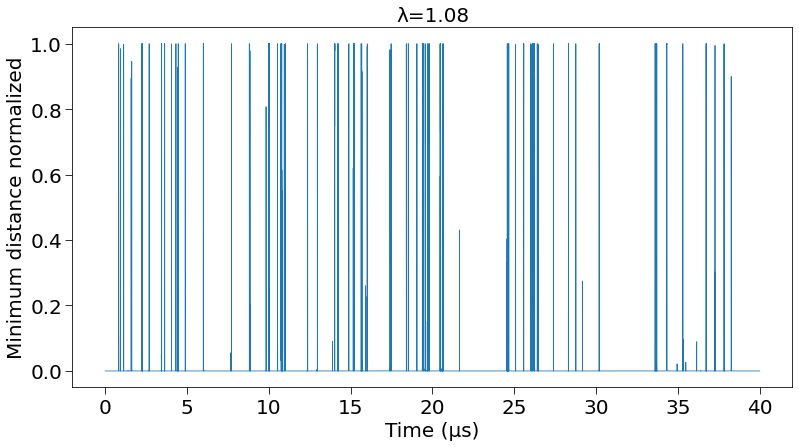

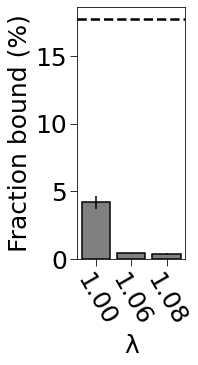

In [13]:
#Analyze fraction bound with single cut-off

fraction_bound_vs_lambda = []
fraction_bound_err_vs_lambda = []
fraction_unbound_vs_lambda = []
fraction_unbound_err_vs_lambda = []

#Loop over lambdas
for l in lambdas:
    
    fraction_bound_vs_replica = []
    fraction_unbound_vs_replica = []
    
    #Loop over replicas
    for replica in range(replicas): 
    
        #Load data (minimum distance betweeen binding-site beads)
        time, mindist = np.genfromtxt('two_ubq_%s/lambda_%s/data/ubq1_ubq2_mindist_lambda%s_bindingsite.xvg' % (str(replica+1),l,l), skip_header=24, usecols=(0,1), unpack=True)

        #Plot data initially
        fig= plt.figure(figsize=(10,5))
        axes= fig.add_axes([1,1,1,1])
        plt.plot(time, mindist, '-', linewidth = 0.8)
        plt.axhline(thresh, linewidth=2.5, color='black', alpha=1)
        plt.title(f'λ={l}, Replica {replica+1}', fontsize=20)
        plt.tick_params(colors='black', direction='out', length=7, labelsize=20)
        plt.ylabel('Minimum distance (nm)', fontsize=20)
        plt.xlabel('Time (µs)', fontsize=20)
        fig.savefig("figures/mindist_vs_time_lambda%s_replica%s.png" % (l,str(replica+1)), bbox_inches='tight', pad_inches=1, dpi=400)
        fig.savefig("figures/mindist_vs_time_lambda%s_replica%s.pdf" % (l,str(replica+1)), bbox_inches='tight', pad_inches=1, dpi=400)

        #Fermi transform to check for two states
        L=1.5
        B=50
        mindist_fermi = 1/(1+np.exp(B*(mindist-L*thresh)))

        #Plot data fermi transformed
        fig= plt.figure(figsize=(10,5))
        axes= fig.add_axes([1,1,1,1])
        plt.plot(time, mindist_fermi, '-', linewidth = 0.8)
        plt.title('λ=' + str(l), fontsize=20)
        plt.tick_params(colors='black', direction='out', length=7, labelsize=20)
        plt.ylabel('Minimum distance normalized', fontsize=20)
        plt.xlabel('Time (µs)', fontsize=20)
        fig.savefig("figures/mindist_vs_time_fermiswitch_lambda%s_replica%s.png" % (l,str(replica+1)), bbox_inches='tight', pad_inches=1, dpi=400)
        fig.savefig("figures/mindist_vs_time_fermiswitch_lambda%s_replica%s.pdf" % (l,str(replica+1)), bbox_inches='tight', pad_inches=1, dpi=400)
        
        #Count number of bound
        frames_bound = np.count_nonzero(mindist < thresh)
        #Get fraction bound
        fraction_bound = frames_bound/len(mindist)
        #Append to list
        fraction_bound_vs_replica.append(fraction_bound)
        
    #Average over replicas
    fraction_bound_avg = np.average(fraction_bound_vs_replica)
    fraction_bound_vs_lambda.append(fraction_bound_avg)

    #Get SEM over replicas
    fraction_bound_err = np.std(fraction_bound_vs_replica)/np.sqrt(np.size(fraction_bound_vs_replica))
    fraction_bound_err_vs_lambda.append(fraction_bound_err)

#Plot fraction bound bar plot
fig= plt.figure(figsize=(1.5,3.5))
axes= fig.add_axes([1,1,1,1])
plt.bar(lambdas, np.array(fraction_bound_vs_lambda)*100, yerr=np.array(fraction_bound_err_vs_lambda)*100, align='center', width = 0.8, color='gray', edgecolor='black', linewidth=1.5)
plt.axhline(np.average(real_fraction_bound_vs_lambda)*100, linewidth=2.5, color='black', linestyle="--")
plt.tick_params(colors='black', direction='out', length=7, labelsize=25)
plt.tick_params(axis='x', colors='black', direction='out', length=7, labelsize=25, rotation=-60)
plt.ylabel('Fraction bound (%)', fontsize=25)
plt.xlabel('λ', fontsize=25)

#Save figure
fig.savefig("figures/fractionbound_vs_lambda_bindingsite.png", bbox_inches='tight', pad_inches=1, dpi=400)
fig.savefig("figures/fractionbound_vs_lambda_bindingsite.pdf", bbox_inches='tight', pad_inches=1, dpi=400)

#Print fraction bound and error
print(fraction_bound_vs_lambda)
print(fraction_bound_err_vs_lambda)